-------------------------------------
# **Uber Data Analysis**
-------------------------------------

--------------------
## **Context**
--------------------

Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in approximately 72 countries and 10,500 cities. In the fourth quarter of 2021, Uber had 118 million monthly active users worldwide and generated an average of 19 million trips per day. 

Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time. 

As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting insights from data that will help the business better understand the demand profile and take appropriate actions to drive better outcomes for the business. Your goal is to identify good insights that are potentially actionable, i.e., the business can do something with it. 

------------------
## **Objective**
------------------

To extract actionable insights around demand patterns across various factors.

-----------------------------
## **Key Questions**
-----------------------------

1. What are the different variables that influence pickups?
2. Which factor affects the pickups the most? What could be plausible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?

------------------------------------
## **Dataset Description**
------------------------------------

The data contains information about the weather, location, and pickups.

* pickup_dt: Date and time of the pick-up
* borough: NYC's borough
* pickups: Number of pickups for the period (1 hour)
* spd: Wind speed in miles/hour
* vsb: Visibility in miles to the nearest tenth
* temp: Temperature in Fahrenheit
* dewp: Dew point in Fahrenheit
* slp: Sea level pressure
* pcp01: 1-hour liquid precipitation
* pcp06: 6-hour liquid precipitation
* pcp24: 24-hour liquid precipitation
* sd: Snow depth in inches
* hday: Being a holiday (Y) or not (N)

##  **Importing the necessary libraries and overview of the dataset**

In [1]:
#Always start with that code
from deepspace.Initialize import Initialize
Initialize(seed=123, ignorewarns=True) # will initialize the random seed for the whole project and remove warnings if need
                             # will show versions of main used libraries
                             


##############################


,version
python,3.9.18
pandas,2.2.1
numpy,1.26.4
tensorflow,2.16.1
sklearn,1.4.2
statsmodels,0.14.0


##############################


### **Loading the dataset, Viewing the dataset altogether**

#### Load and overview of the data : 

In [2]:
file = r"uber.csv"

from deepspace.transformers.Transformer import Transformer
from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.chain.Checkpoint import Checkpoint
from deepspace.transformers.overview.Overview import Overview

_ = (
    CSVLoader(file, ",")
    >> Overview() 
)

================================================== Overview transform  


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


(29101, 13)


#### We can also create a chain of Monads : 

In [3]:
file = r"uber.csv"

from deepspace.transformers.Transformer import Transformer
from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Start import Start
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.chain.Checkpoint import Checkpoint
from deepspace.transformers.overview.Overview import Overview
from deepspace.transformers.overview.Describe import DescribeNumerical, DescribeCategorical
from deepspace.transformers.outliers.Check import CheckOutliers
from deepspace.transformers.duplicates.CheckDuplicated import CheckDuplicated
from deepspace.transformers.null.Check import CheckNulls
from deepspace.transformers.overview.CheckUniqueness import CheckUniqueness

_ = ( _
     >> DescribeNumerical()
     >> DescribeCategorical() 
     >> CheckUniqueness()
     >> CheckNulls() 
     >> CheckDuplicated()
     >> CheckOutliers()
)

================================================== DescribeNumerical transform  


,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,29101.0,47.669042,19.814969,2.0,32.0,46.0,64.500000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


================================================== DescribeCategorical transform  


,count,unique,top,freq
pickup_dt,29101,4343,2015-01-01 01:00:00,7
borough,26058,6,Bronx,4343
hday,29101,2,N,27980


==================================================  check_unique  
==================================================  view_uniqueness  
==================================================  get_uniqueness  


,0
hday,2
borough,6
pcp01,80
spd,114
vsb,179
temp,295
dewp,305
pcp06,318
slp,413
sd,421


================================================== CheckNulls check_nulls  


,count,pct
pickup_dt,0,0.000000
borough,3043,10.456685
pickups,0,0.000000
spd,0,0.000000
vsb,0,0.000000
temp,0,0.000000
dewp,0,0.000000
slp,0,0.000000
pcp01,0,0.000000
pcp06,0,0.000000


================================================== CheckDuplicated check_dupes  
Duplicates found : 0
================================================== CheckOutliers check_outliers  
Feature *pickups*: found 3498 upper_bound rows outliers
Feature *spd*: found 451 upper_bound rows outliers
Feature *vsb*: found 5322 lower_bound outliers
Feature *slp*: found 89 lower_bound outliers
Feature *slp*: found 190 upper_bound rows outliers
Feature *pcp01*: found 2633 upper_bound rows outliers
Feature *pcp06*: found 5641 upper_bound rows outliers
Feature *pcp24*: found 5016 upper_bound rows outliers
Feature *sd*: found 6060 upper_bound rows outliers


#### Cloning

#Copying data to another variable to avoid any changes to the original data

data_copy = df.copy()

In [4]:
# Copying data to another variable to avoid any changes to the original data
milestone_checkpoint = _.clone()

### **View the first 5 rows of the dataset**

In [5]:
# Looking at head (the first 5 observations) 
# already done but could be done as in:
from deepspace.transformers.overview.HeadTail import HeadTail
_ =  (_ >> HeadTail())

================================================== HeadTail transform  


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


**Observations:**

* The column pickup_dt includes the pickup date and time. The date shows that the data starts from 01-Jan-2015.
* The column borough contains the name of the New York borough in which the pickup was made.
* The column pickups contain the number of pickups in the borough at the given time. 
* All of the weather variables are numerical.
* The variable holiday is a categorical variable.

### **View the last 5 rows of the dataset**

In [6]:
# Looking at tail (the last 5 observations) 
# already done but could be done as in: but could be done as in:
from deepspace.transformers.overview.HeadTail import HeadTail
_ = (_
     >> HeadTail() 
)

================================================== HeadTail transform  


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


**Observations:**

* The head indicated that the data began on January 1, 2015, whereas the tail indicates that it continued until June 30, 2015. This means we have **six months' worth of data to analyze**.

### **Checking the shape of the dataset**

In [7]:
# already done but could be done as in: but could be done as in:
from deepspace.transformers.overview.Shape import Shape
_ = (_
     >> Shape() 
)

================================================== Shape transform  
(29101, 13)


* The dataset has **29,101 rows and 13 columns**.

### **Checking the info()**

In [8]:
# already done but could be done as in: but could be done as in:
from deepspace.transformers.overview.Info import Info

_ = (_
     >> Info() 
)

================================================== Info transform  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


**Observations:**

* All columns have 29,101 observations except borough, which has 26,058 observations indicating that there are null values in it.
* pickup_dt is read as an 'object' data type, but it should have the data type as DateTime.
* borough and hday (holiday) should be categorical variables.

### **Summary of the data**

In [9]:
# already done but could be done as in: but could be done as in:
_ = (_
     >> Overview() 
)

================================================== Overview transform  


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


(29101, 13)


* There is a significant discrepancy between the third quartile and the highest value for the number of pickups (pickups) and the snow depth (sd), indicating that these variables may have outliers to the right.
* The temperature has a broad range, showing that the data includes records from the winter as well as summer seasons.

**By default, the describe() function shows the summary of numeric variables only. Let's check the summary of non-numeric variables.**  

#### Describe categorical features

In [10]:
#df.describe(exclude = 'number').T
# already done but could be done as in: but could be done as in:
_ = (_
        >> DescribeCategorical()
)

================================================== DescribeCategorical transform  


,count,unique,top,freq
pickup_dt,29101,4343,2015-01-01 01:00:00,7
borough,26058,6,Bronx,4343
hday,29101,2,N,27980


**Observations:**

* The variable 'borough' has six unique categories. The category Bronx has occurred 4,343 times in the data.
* The variable 'hday' has 2 unique categories. The category N, i.e., not a holiday as occurred more often, which makes sense.

**Let's check the count of each unique category in each of the categorical variables.**

#### Check uniqueness of categorical features

```
## Making a list of all categorical variables 
#cat_col = ['borough', 'hday']
#
## Printing number of count of each unique value in each column
#for column in cat_col:
#    print(df[column].value_counts())
#    
#    print('-' * 50)
```

In [11]:

#the above code could be replaced by this :
_ =  ( _
     >> CheckUniqueness()
)    

==================================================  check_unique  
==================================================  view_uniqueness  
==================================================  get_uniqueness  


,0
hday,2
borough,6
pcp01,80
spd,114
vsb,179
temp,295
dewp,305
pcp06,318
slp,413
sd,421


* The above output shows that the borough variable has an equal count for each category.

### **Extracting date parts from pickup date**

```
# Converting pickup_dt datatype to datetime 
df.pickup_dt = pd.to_datetime(df.pickup_dt)

# Extracting date parts from pickup_dt
df['start_year'] = df.pickup_dt.dt.year

df['start_month'] = df.pickup_dt.dt.month_name()

df['start_hour'] = df.pickup_dt.dt.hour

df['start_day'] = df.pickup_dt.dt.day

df['week_day'] = df.pickup_dt.dt.day_name()
```

In [12]:
#the above code is feature engineering and, once validated, could be reused as is
#here DeepSpace dos not help much more, it's part of data analysis and comprehension
#but the DeepSpace way is reusability through OOP:
import pandas as pd
# Library to extract datetime features
import datetime as dt
class FeatureEngineerMakeDateParts(Transformer):
    '''Target Feature Engineering'''
    def __init__(self, col=None):
        Transformer.__init__(self)
        self.col = col
    def transform(self, ds):
        df = ds.data
        df[self.col] = pd.to_datetime(df[self.col])
        df[f'{self.col}_year'] = df[self.col].dt.year
        df[f'{self.col}_month'] = df[self.col].dt.month_name()
        df[f'{self.col}_hour'] = df[self.col].dt.hour
        df[f'{self.col}_day'] = df[self.col].dt.day
        df[f'{self.col}_week_day'] = df[self.col].dt.day_name()
        return ds
    
# now you can use it in future projects:   
_ =  ( _
     >> FeatureEngineerMakeDateParts(col='pickup_dt')
)    

In [13]:
data = _.get_ds().get_data()
data.columns

Index(['pickup_dt', 'borough', 'pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp',
       'pcp01', 'pcp06', 'pcp24', 'sd', 'hday', 'pickup_dt_year',
       'pickup_dt_month', 'pickup_dt_hour', 'pickup_dt_day',
       'pickup_dt_week_day'],
      dtype='object')

#### Drop column

```
# Removing pickup_dt column as it will not be required for further analysis
#df.drop('pickup_dt', axis = 1, inplace = True)
```

In [14]:
# you can drop in DeepSpace like this :
from deepspace.transformers.drop.DropCols import DropCols
from deepspace.transformers.column.Drop import Adjust as DropAdjuster 
from deepspace.transformers.column.Drop import ViewDrop as DroppedView 

_ = (_ 
             >> DropAdjuster(['pickup_dt']) 
             >> DropCols() 
)
# why you would do that that way ? because then you can check what you've dropped as DeepSpace will store the dropped cols :
_ =  ( _
     >> DroppedView()
)    

================================================== Adjust transform  
droping cols pickup_dt
remaining cols borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,pickup_dt_year,pickup_dt_month,pickup_dt_hour,pickup_dt_day,pickup_dt_week_day
================================================== ViewDrop transform  
['pickup_dt']


#### View the columns after feature engineering

```
df.info()
```

In [15]:
from deepspace.transformers.overview.Info import Info

_ = (_ >> Info())

================================================== Info transform  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   borough             26058 non-null  object 
 1   pickups             29101 non-null  int64  
 2   spd                 29101 non-null  float64
 3   vsb                 29101 non-null  float64
 4   temp                29101 non-null  float64
 5   dewp                29101 non-null  float64
 6   slp                 29101 non-null  float64
 7   pcp01               29101 non-null  float64
 8   pcp06               29101 non-null  float64
 9   pcp24               29101 non-null  float64
 10  sd                  29101 non-null  float64
 11  hday                29101 non-null  object 
 12  pickup_dt_year      29101 non-null  int32  
 13  pickup_dt_month     29101 non-null  object 
 14  pickup_dt_hour      29101 non-null

### **Missing value treatment**

```
# Checking missing values
df.isna().sum()
```

In [16]:
from deepspace.transformers.null.Check import CheckNulls
#The DeepSpace way with count and percentage altogether:
_ = (_ 
             >> CheckNulls() 
        )

================================================== CheckNulls check_nulls  


,count,pct
borough,3043,10.456685
pickups,0,0.000000
spd,0,0.000000
vsb,0,0.000000
temp,0,0.000000
dewp,0,0.000000
slp,0,0.000000
pcp01,0,0.000000
pcp06,0,0.000000
pcp24,0,0.000000


* There are 3043 missing values for the variable borough.
* Other variables have no missing values.

# Checking the missing values further
#df.borough.value_counts(normalize = True, dropna = False)

In [17]:
#DeepSapce way :
from deepspace.transformers.exploration.univariate.categorical.ValueCounter import ValueCounter
_ = (_ 
    >> ValueCounter(cat_cols=['borough']) 
)

==================================================  show_count_new  
-------------------------------------------------- borough


,count,proportion
borough,,
Bronx,4343,0.149239
Brooklyn,4343,0.149239
EWR,4343,0.149239
Manhattan,4343,0.149239
Queens,4343,0.149239
Staten Island,4343,0.149239
NaN,3043,0.104567


* All the six categories have the same percentage, i.e., ~15%. There is no mode (or multiple modes) for this variable.
* The percentage of missing values is close to the percentage of observations from other boroughs.
* We can treat the missing values as a separate category for this variable.

```
# Replacing NaN with Unknown
df['borough'].fillna('Unknown', inplace = True) 
```

In [18]:

#DeepSpace way:
from deepspace.transformers.null.Process import ProcessImputation
_ = (_ 
    >> ProcessImputation(cat_cols=['borough'], method='value', value='UNKNOWN') 
)

================================================== ProcessImputation transform  
================================================== ProcessImputation set_value  
--------------------------------------------------processing borough


,count
borough,
Bronx,4343
Brooklyn,4343
EWR,4343
Manhattan,4343
Queens,4343
Staten Island,4343
UNKNOWN,3043


df.borough.value_counts()

In [19]:
#one possiblity is to get to the encapsulated dataframe (and "break" encapsulation):
_.get_data().borough.value_counts()

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
UNKNOWN          3043
Name: count, dtype: int64

In [20]:
#...or the DeepSpace way :
_ >> ValueCounter(cat_cols=['borough'])

==================================================  show_count_new  
-------------------------------------------------- borough


,count,proportion
borough,,
Bronx,4343,0.149239
Brooklyn,4343,0.149239
EWR,4343,0.149239
Manhattan,4343,0.149239
Queens,4343,0.149239
Staten Island,4343,0.149239
UNKNOWN,3043,0.104567


```
df.isnull().sum()
```

In [21]:
#DeepSpace will show coutn and % (we know we need both 80% of the time):
_ = (_ >> CheckNulls())

================================================== CheckNulls check_nulls  


,count,pct
borough,0,0.0
pickups,0,0.0
spd,0,0.0
vsb,0,0.0
temp,0,0.0
dewp,0,0.0
slp,0,0.0
pcp01,0,0.0
pcp06,0,0.0
pcp24,0,0.0


* Now, there are no missing values in the data.

## **Exploratory Data Analysis: Univariate**

**Let us explore the numerical variables first.**

```
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    #Creating the subplots
    #Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    #For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()
```

================================================== UnivariateAnalysis transform  
==================================================  show_count  
pickups
0       0.191299
1       0.091268
2       0.058349
3       0.032198
4       0.016288
          ...   
4029    0.000034
4406    0.000034
4560    0.000034
3402    0.000034
3828    0.000034
Name: proportion, Length: 3406, dtype: float64
--------------------------------------------------
spd
5.000000     0.131130
0.000000     0.123570
6.000000     0.121817
3.000000     0.117934
7.000000     0.103811
               ...   
12.250000    0.000206
13.666667    0.000206
16.333333    0.000206
16.750000    0.000206
10.333333    0.000206
Name: proportion, Length: 114, dtype: float64
--------------------------------------------------
vsb
10.000    0.741487
9.100     0.039071
8.000     0.029037
7.000     0.026803
6.000     0.019243
            ...   
1.250     0.000206
0.850     0.000206
4.375     0.000206
3.560     0.000206
1.950     0.000206
Name

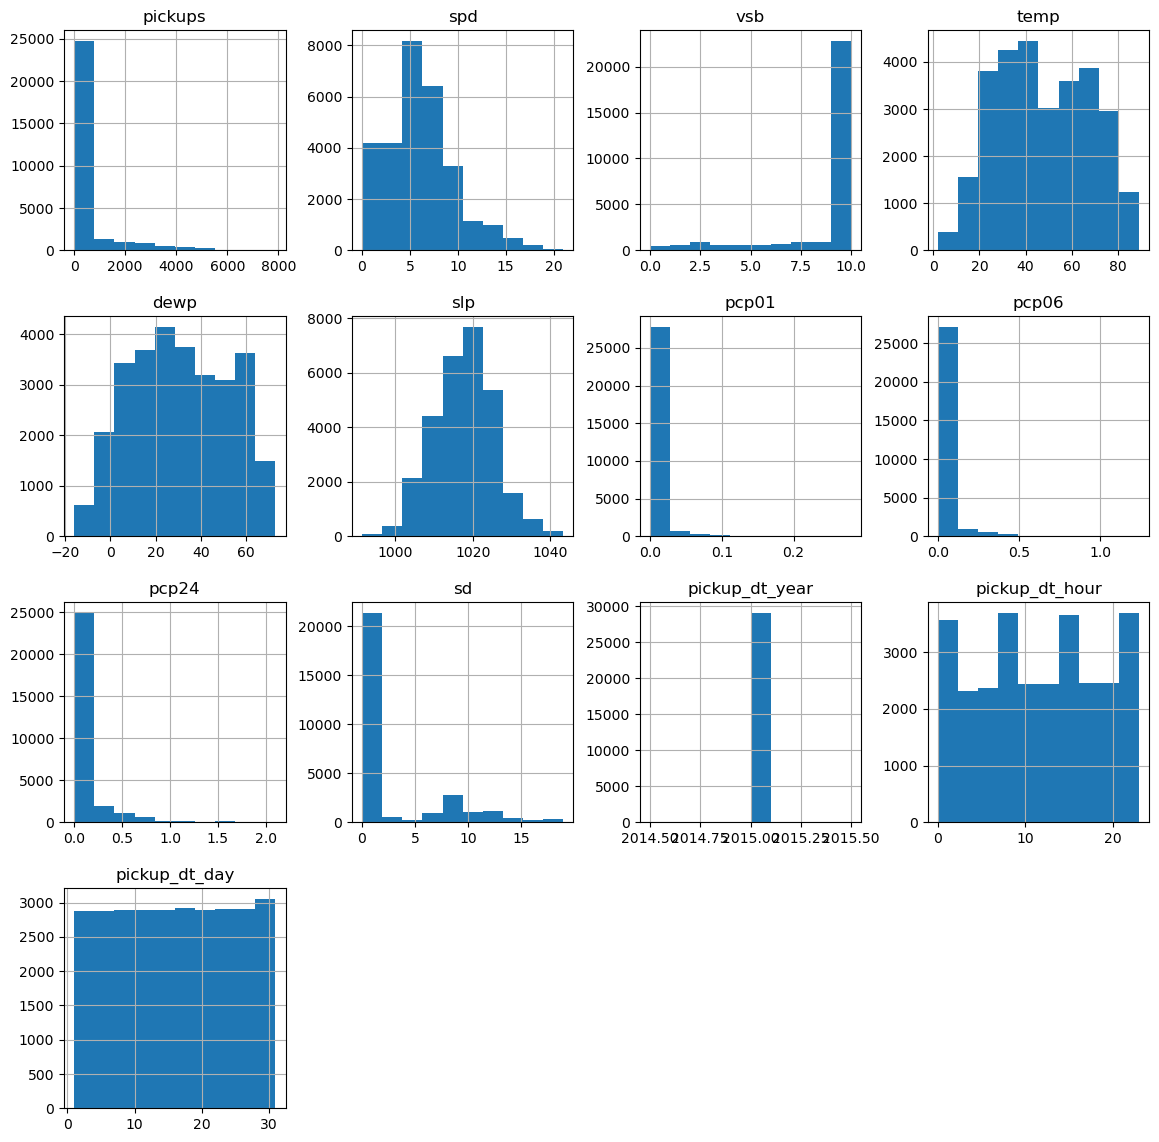

==================================================  analyse histobox for pickups 


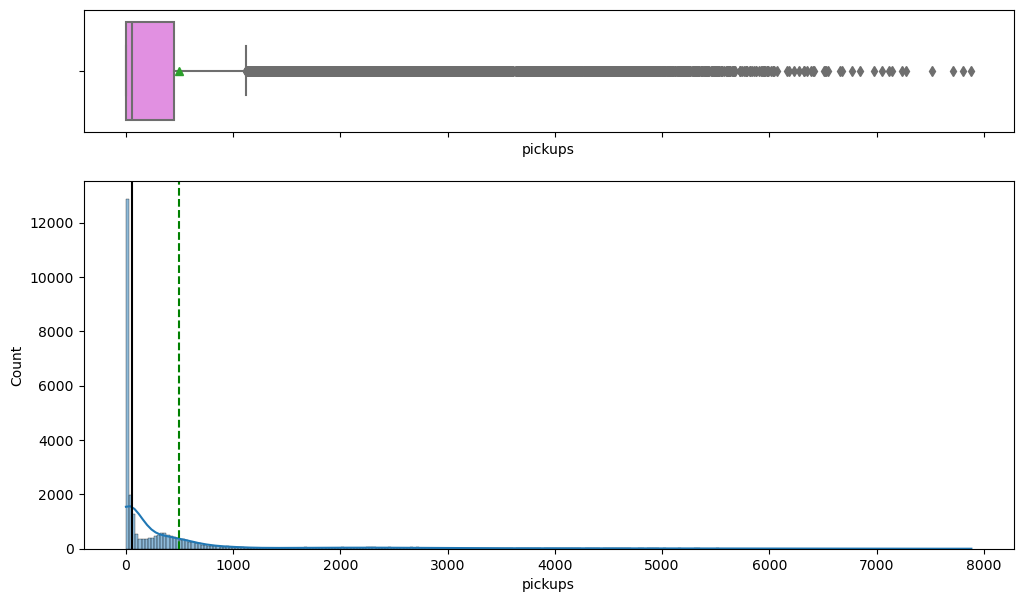

==================================================  analyse histobox for spd 


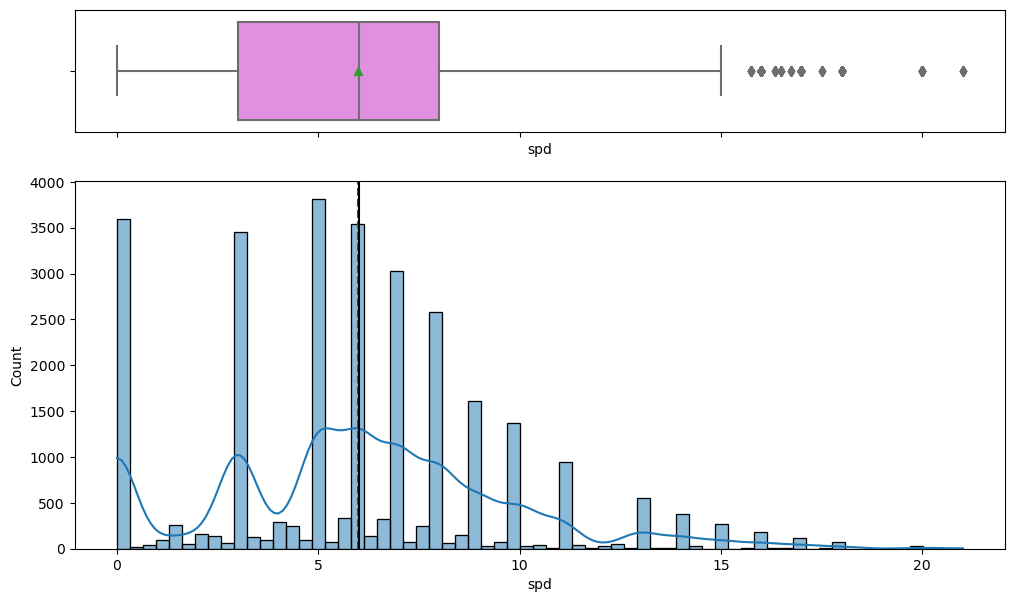

==================================================  analyse histobox for vsb 


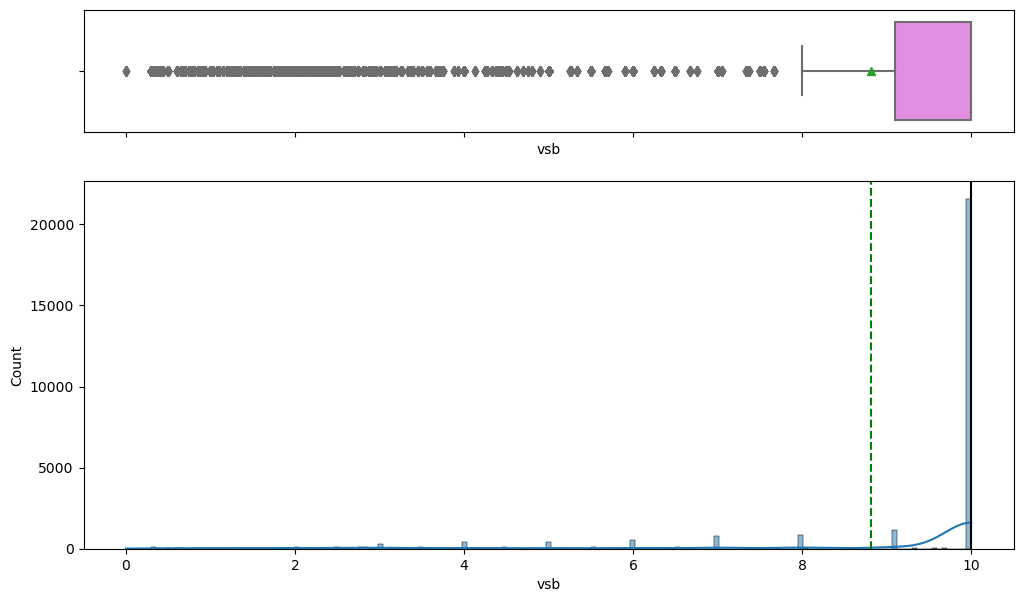

==================================================  analyse histobox for temp 


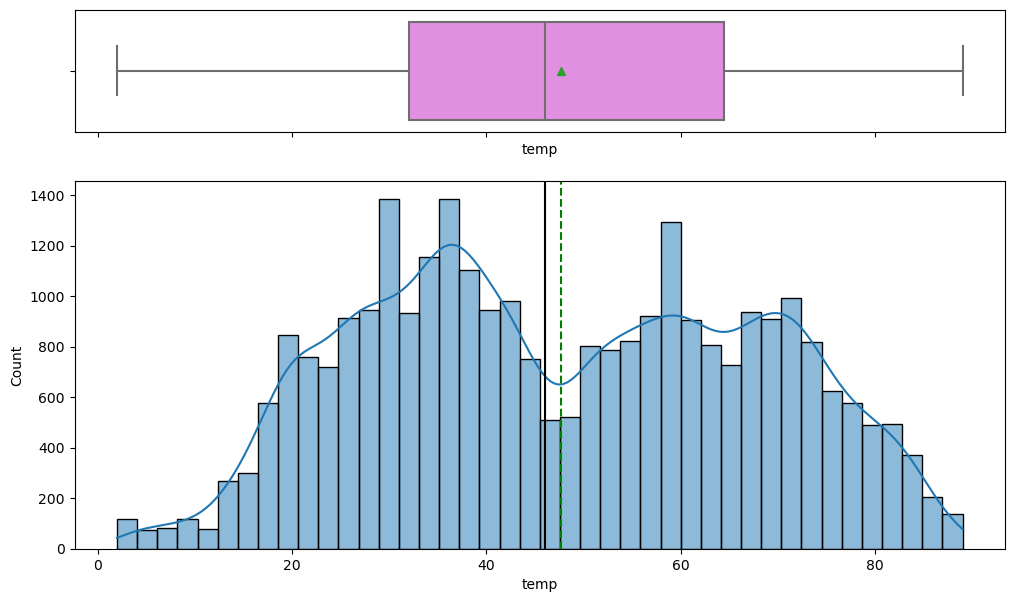

==================================================  analyse histobox for dewp 


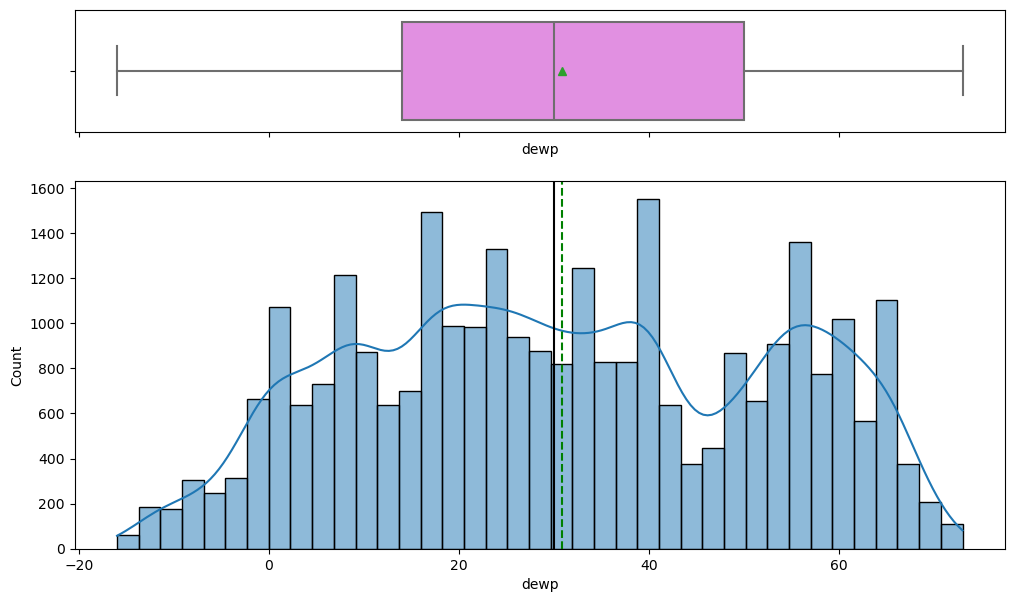

==================================================  analyse histobox for slp 


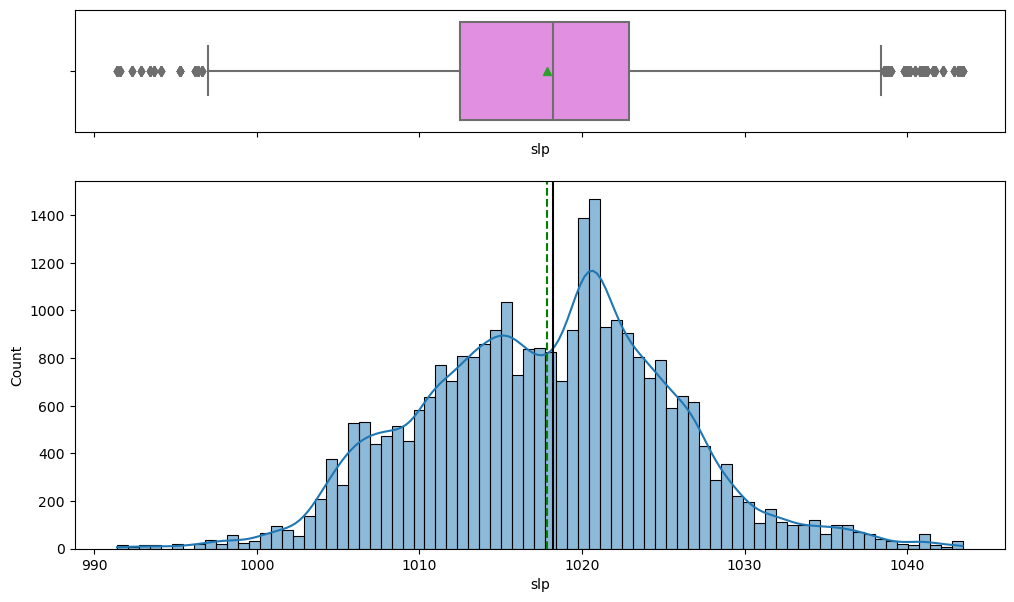

==================================================  analyse histobox for pcp01 


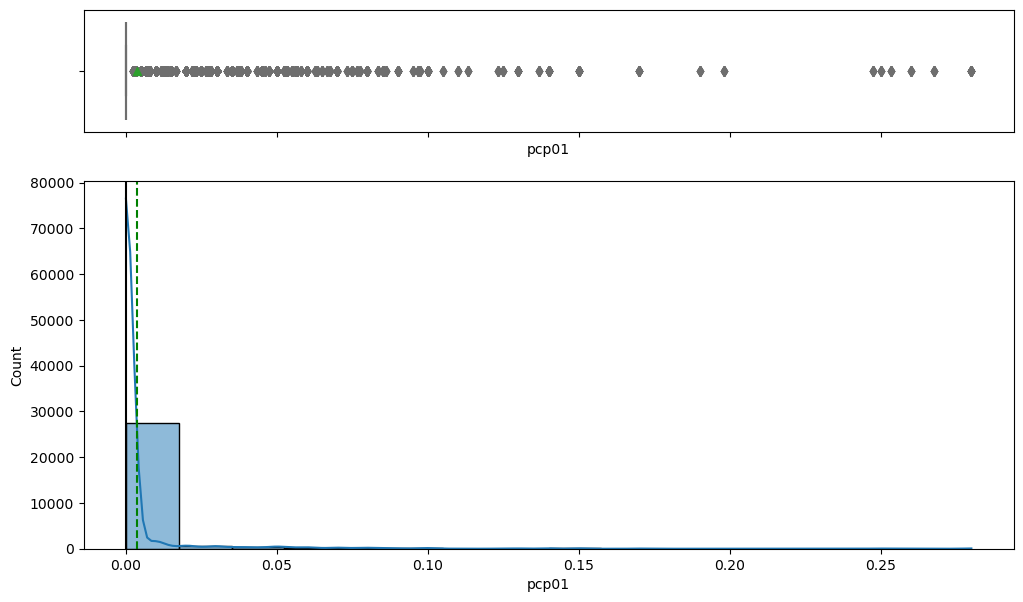

==================================================  analyse histobox for pcp06 


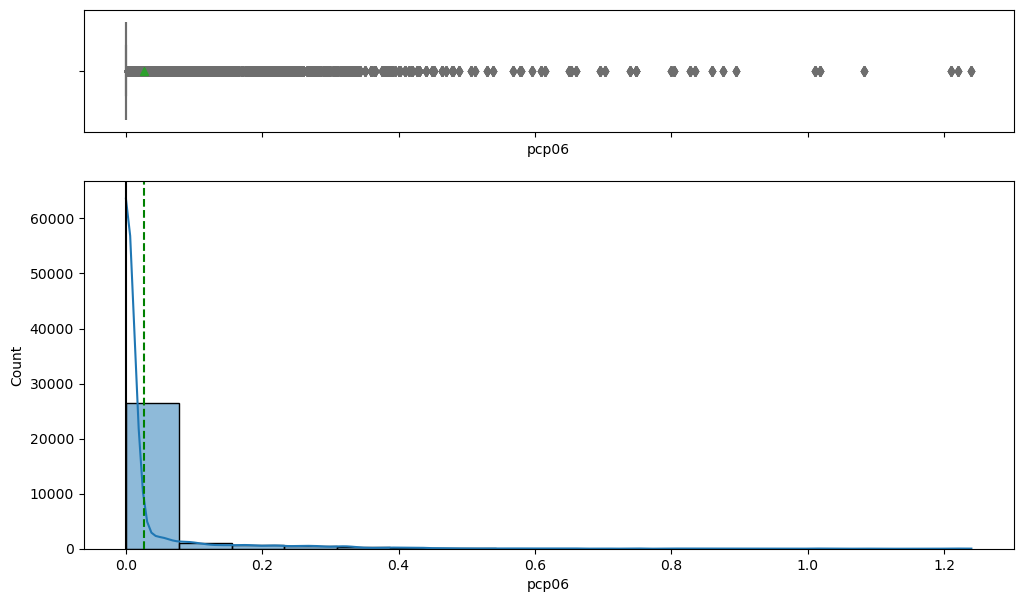

==================================================  analyse histobox for pcp24 


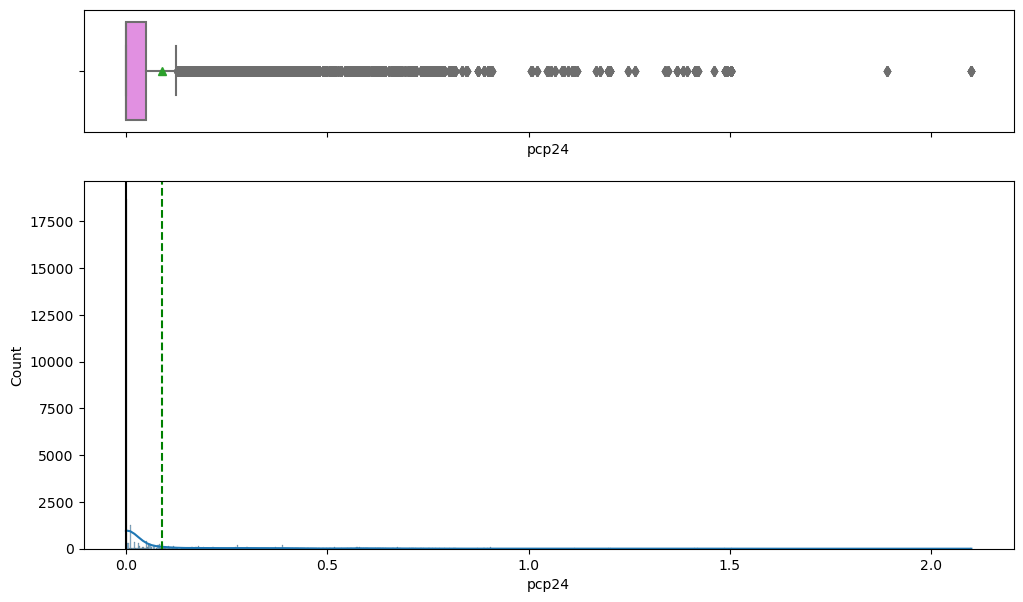

==================================================  analyse histobox for sd 


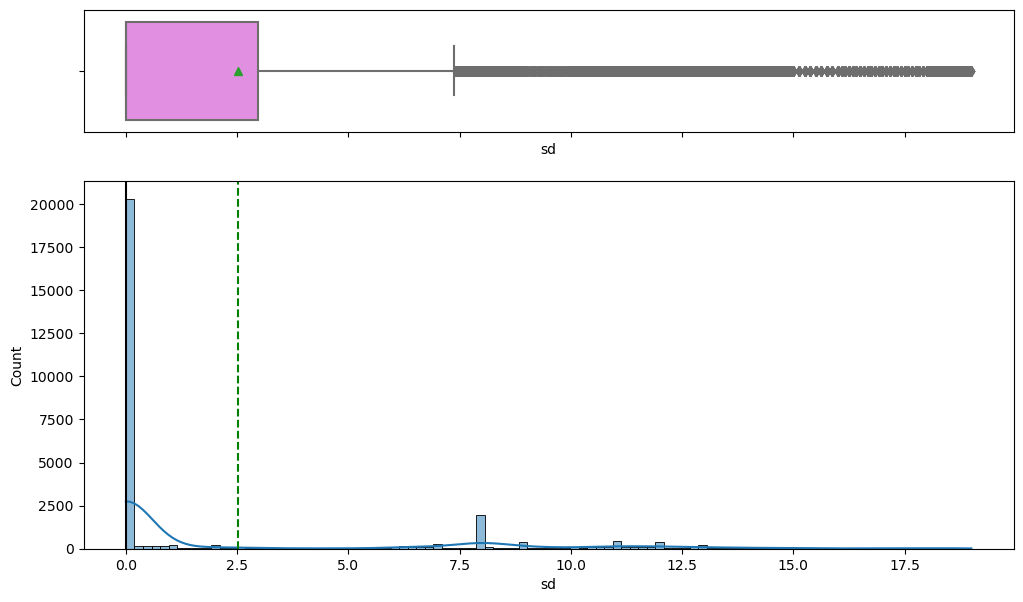

==================================================  analyse histobox for pickup_dt_year 


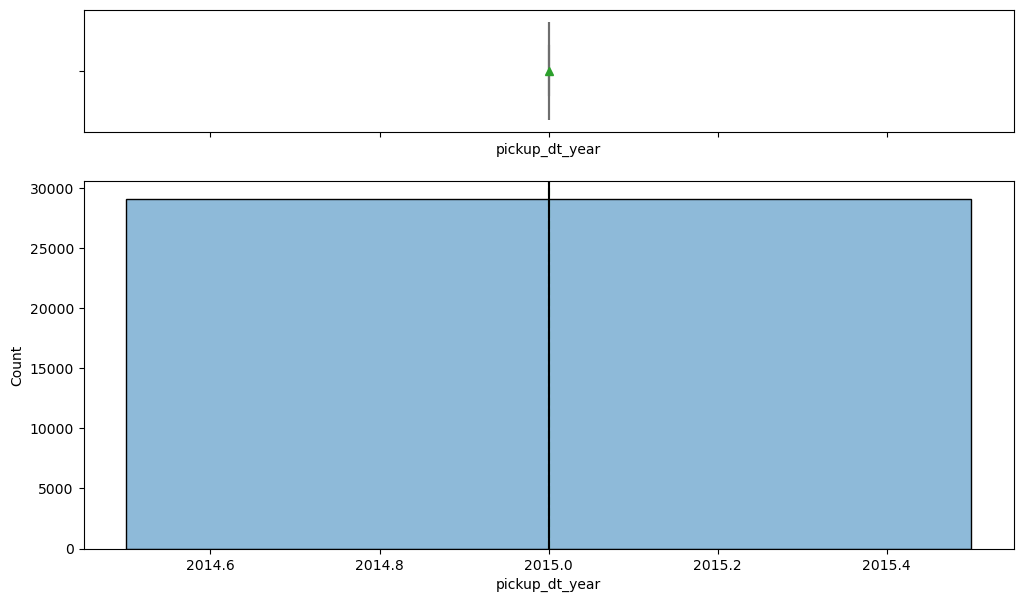

==================================================  analyse histobox for pickup_dt_hour 


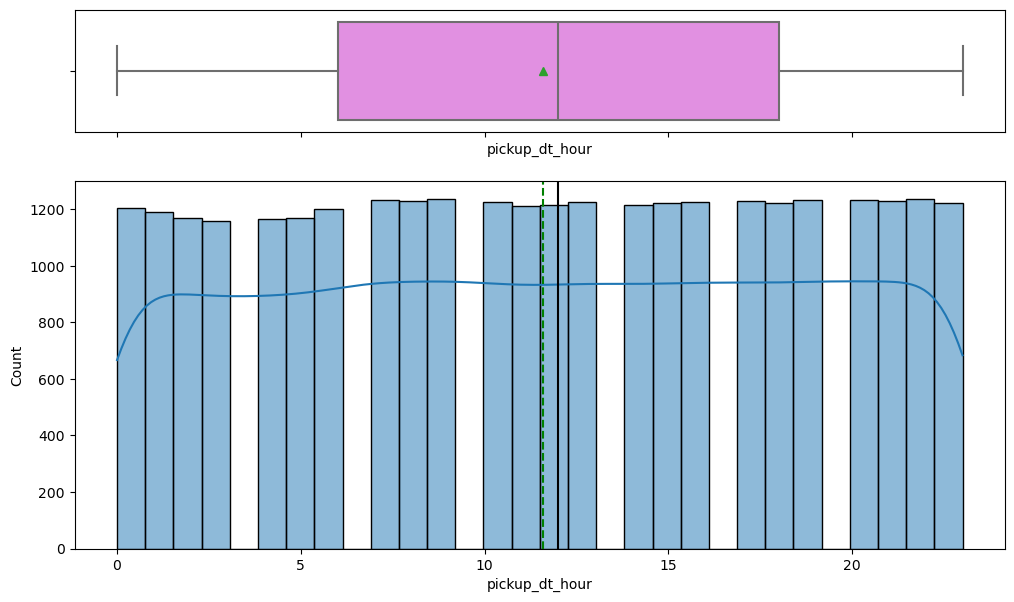

==================================================  analyse histobox for pickup_dt_day 


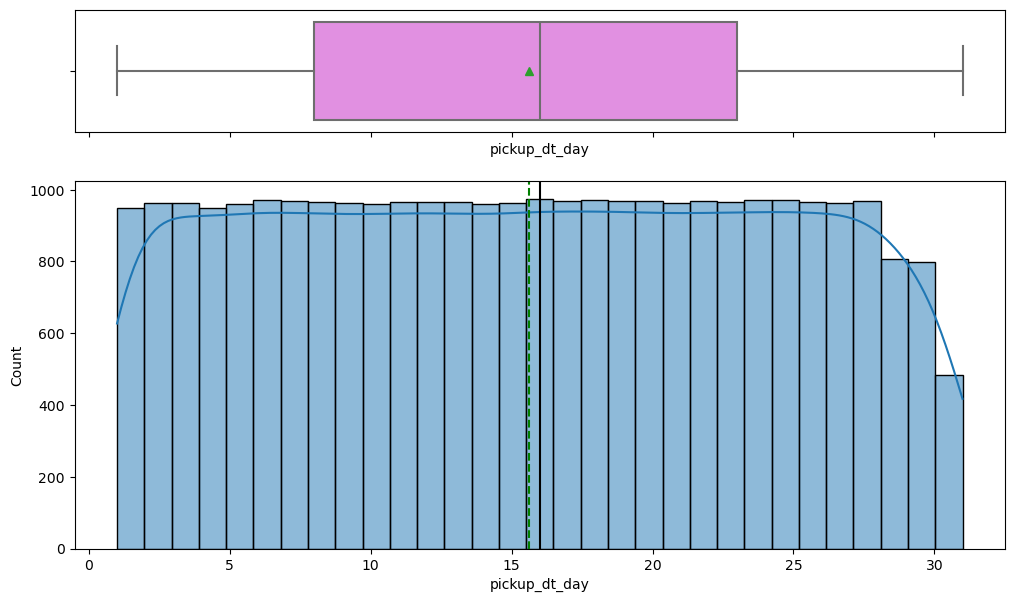

==================================================  analyse violin for pickups 


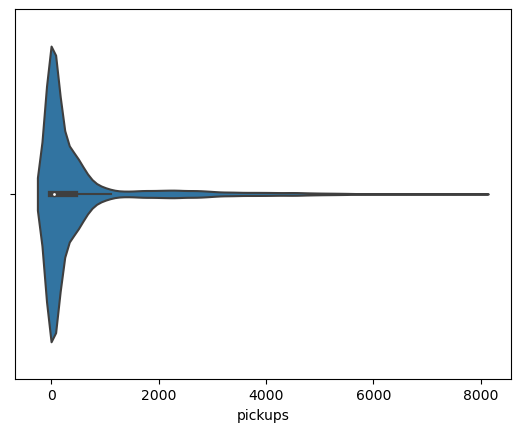

==================================================  analyse violin for spd 


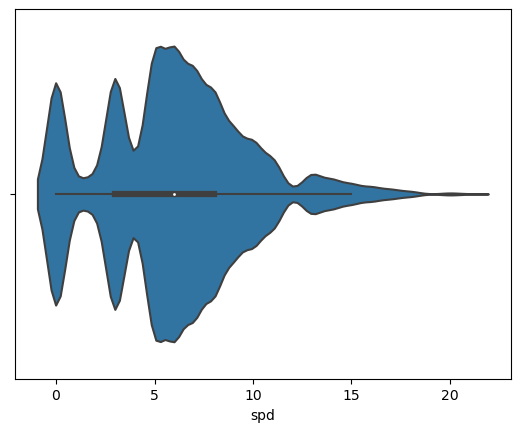

==================================================  analyse violin for vsb 


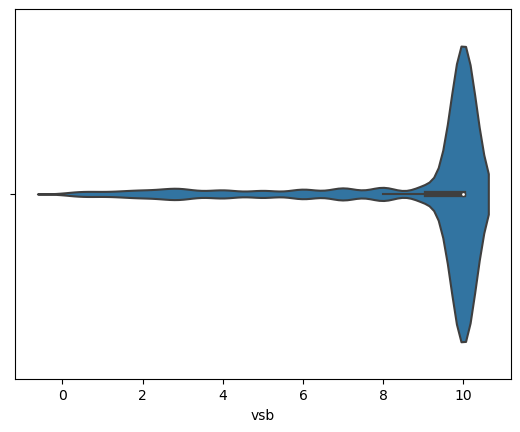

==================================================  analyse violin for temp 


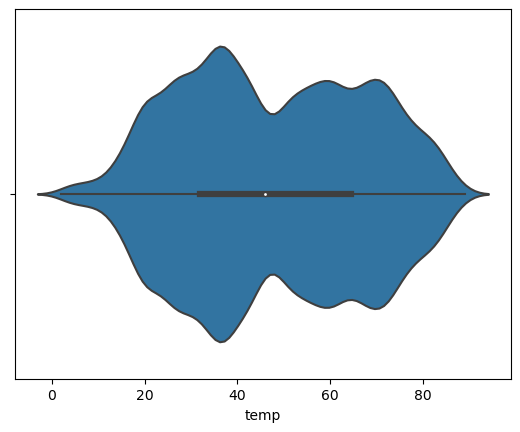

==================================================  analyse violin for dewp 


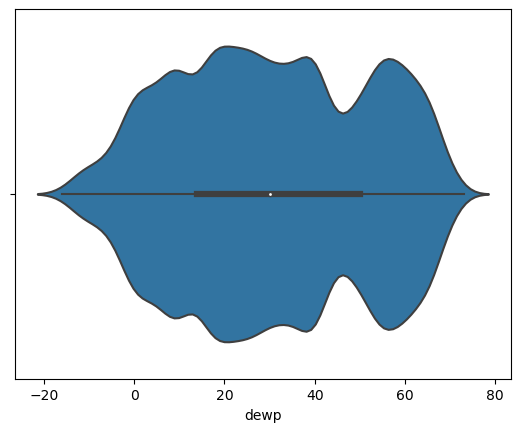

==================================================  analyse violin for slp 


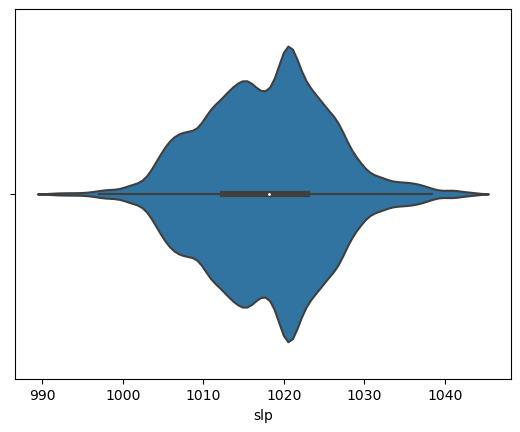

==================================================  analyse violin for pcp01 


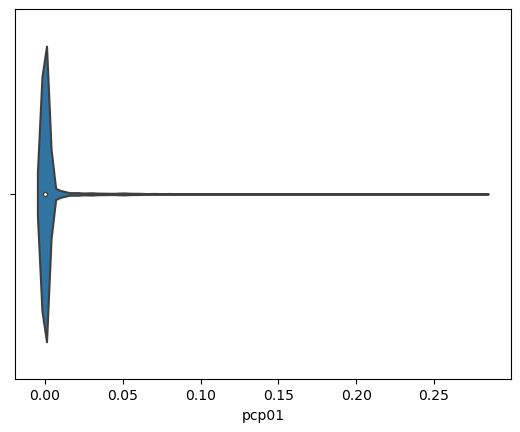

==================================================  analyse violin for pcp06 


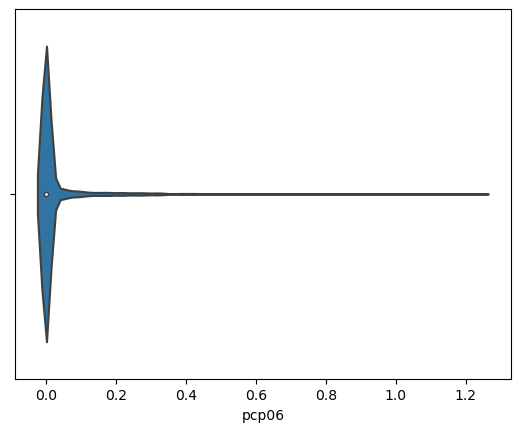

==================================================  analyse violin for pcp24 


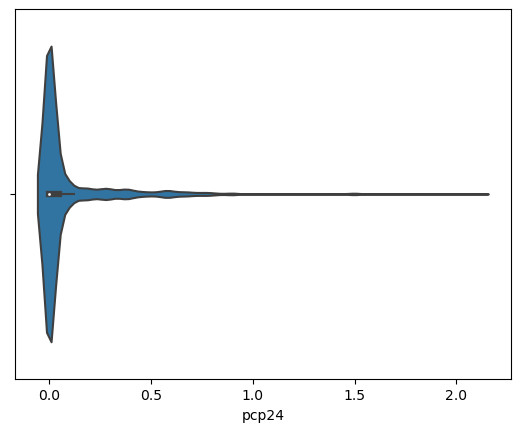

==================================================  analyse violin for sd 


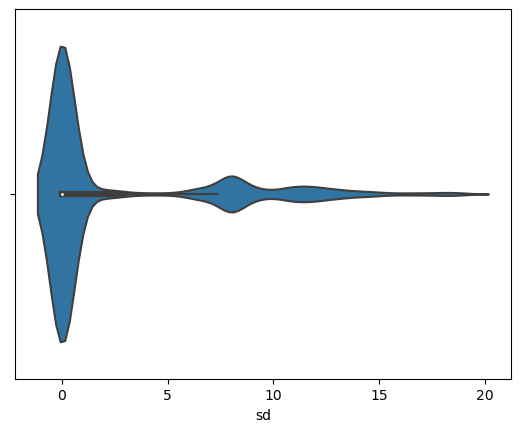

==================================================  analyse violin for pickup_dt_year 


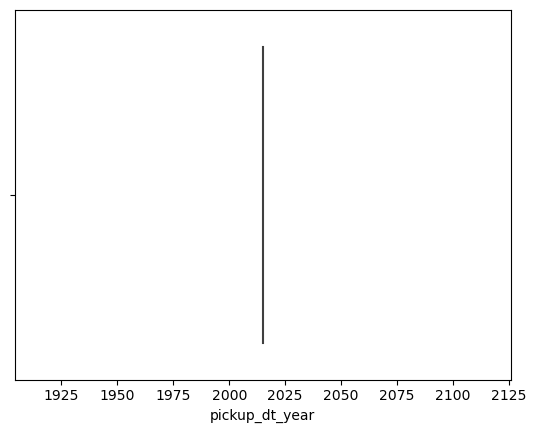

==================================================  analyse violin for pickup_dt_hour 


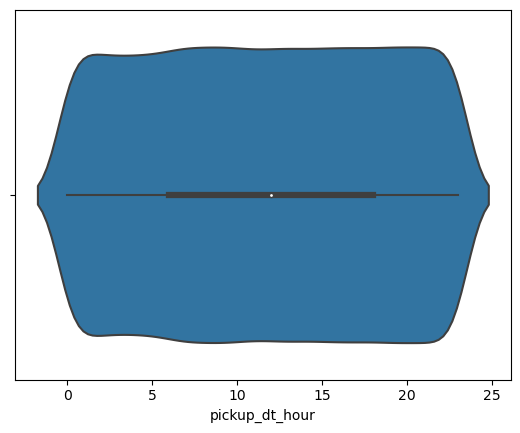

==================================================  analyse violin for pickup_dt_day 


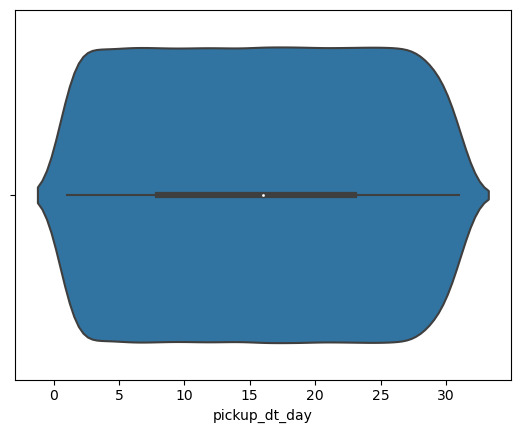

In [22]:
from deepspace.transformers.exploration.univariate.numerical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
#this will show a bunch of graphs for every numeric feature 
_ = (_ 
    >> UnivariateAnalysis() 
)


================================================== UnivariateAnalysis transform  
==================================================  show_count  
pcp01
0.000000    0.909522
0.010000    0.015085
0.020000    0.006220
0.030000    0.005051
0.005000    0.004845
              ...   
0.012000    0.000206
0.062500    0.000206
0.066667    0.000206
0.105000    0.000206
0.077500    0.000206
Name: proportion, Length: 80, dtype: float64
--------------------------------------------------
==================================================  analyse  


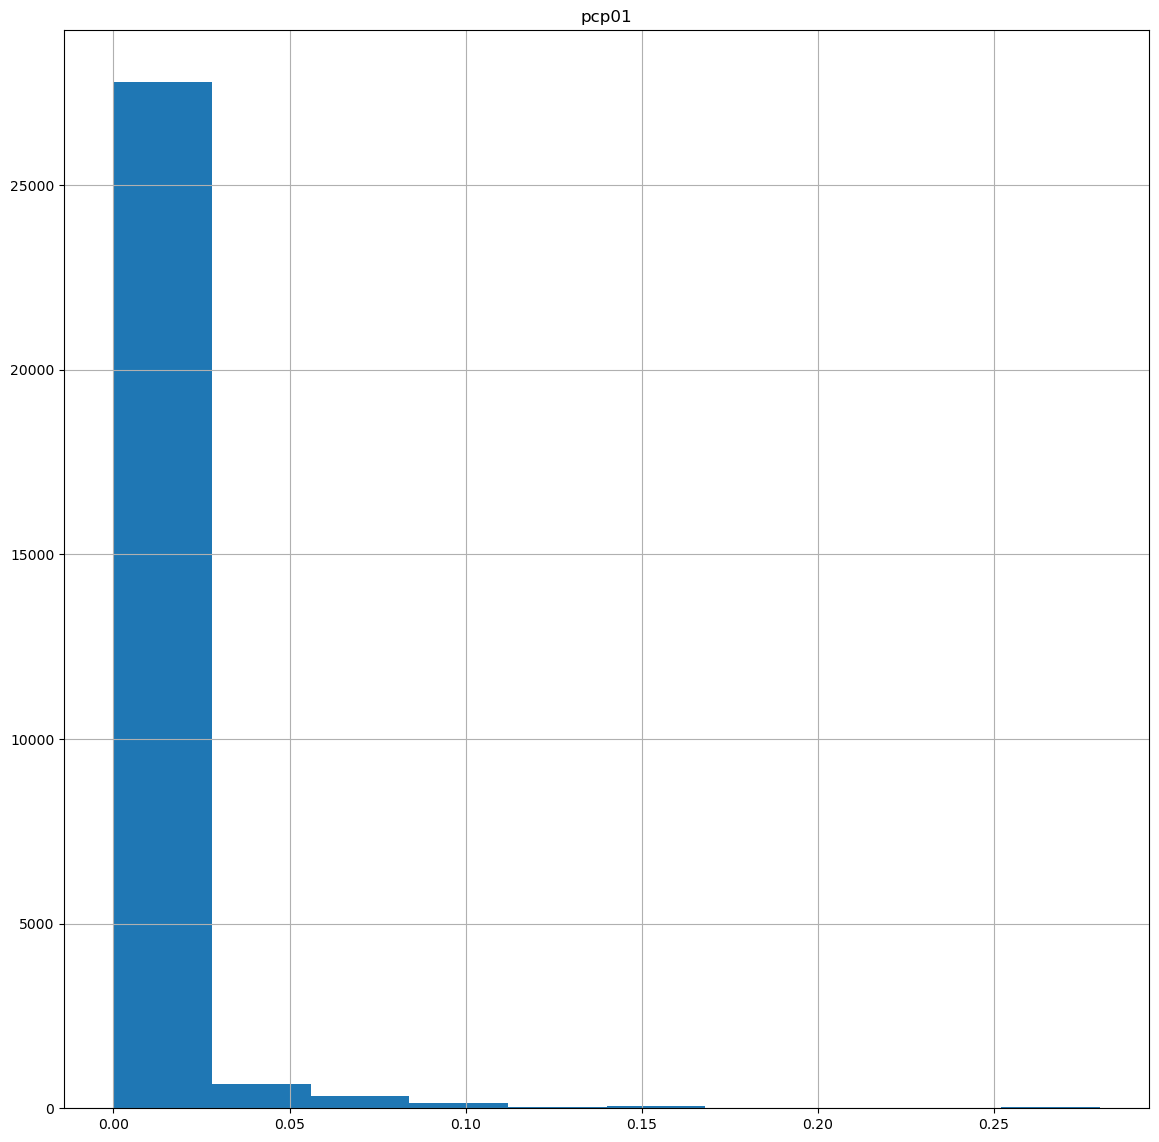

==================================================  analyse histobox for pcp01 


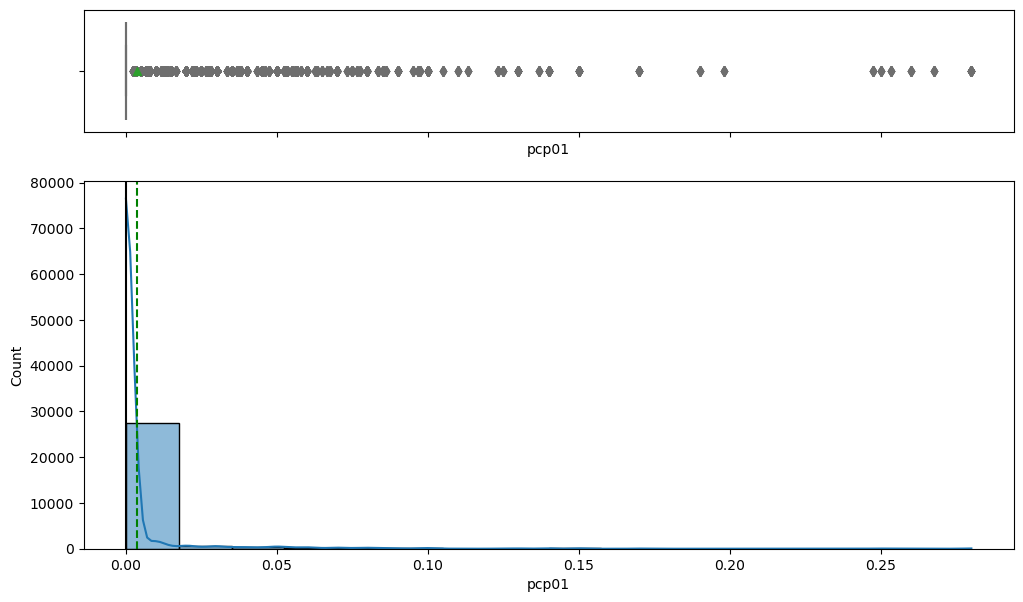

==================================================  analyse violin for pcp01 


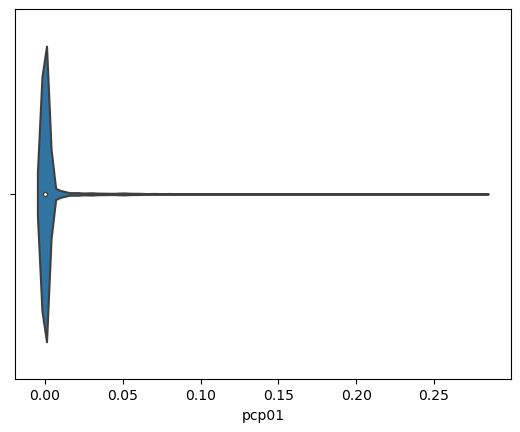

In [23]:
from deepspace.transformers.exploration.univariate.numerical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
#you can check a specific numeric feature:
_ = (_ 
    >> UnivariateAnalysis(num_cols=['pcp01']) 
)


### **Observations on Pickups**

```
histogram_boxplot(df.pickups)
```

================================================== UnivariateAnalysis transform  
==================================================  show_count  
pickups
0       0.191299
1       0.091268
2       0.058349
3       0.032198
4       0.016288
          ...   
4029    0.000034
4406    0.000034
4560    0.000034
3402    0.000034
3828    0.000034
Name: proportion, Length: 3406, dtype: float64
--------------------------------------------------
==================================================  analyse  


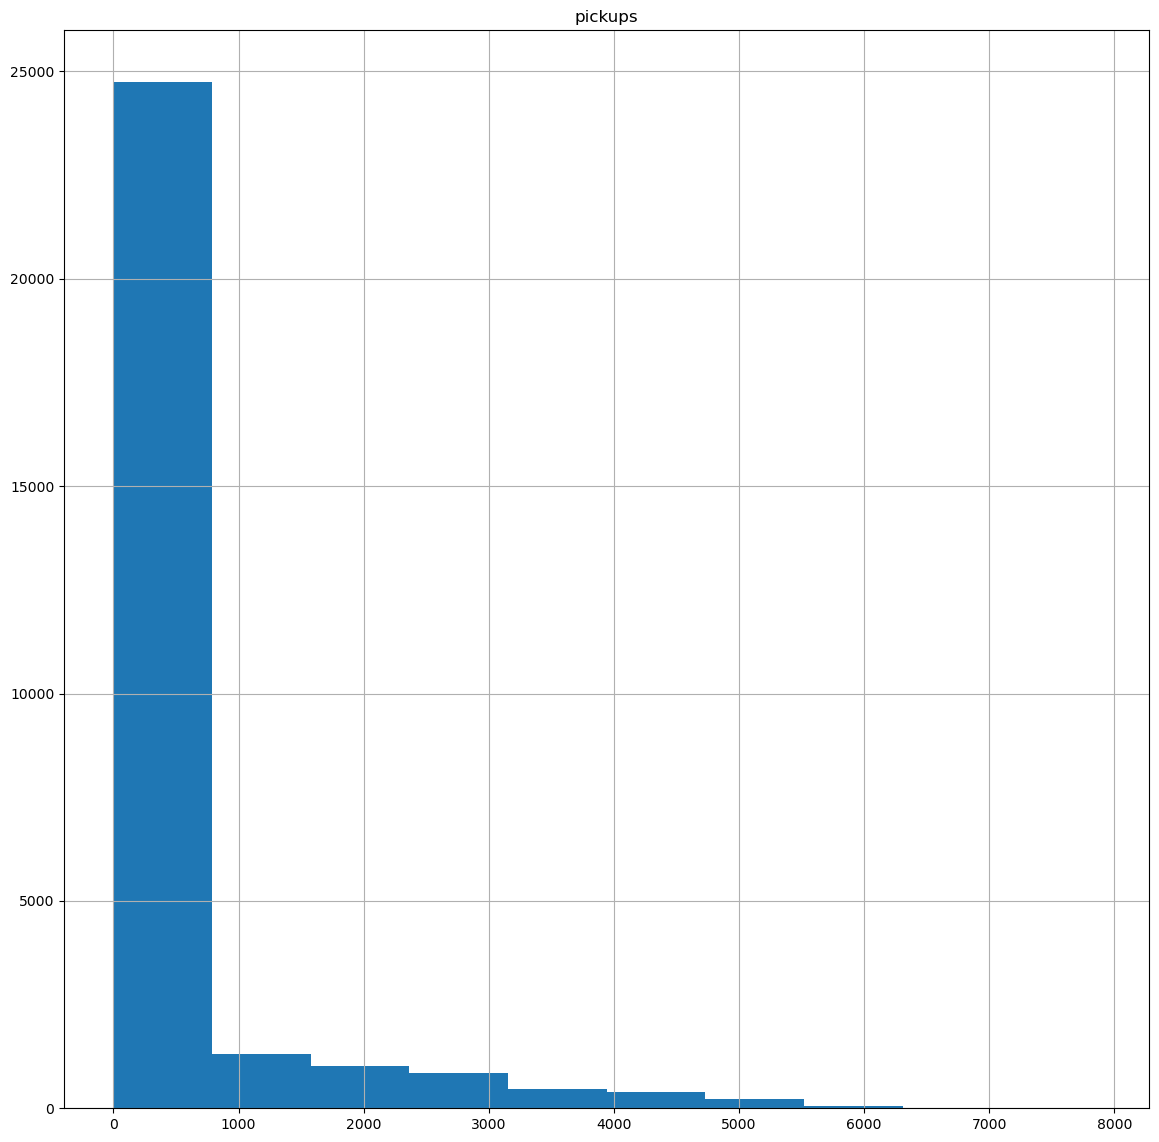

==================================================  analyse histobox for pickups 


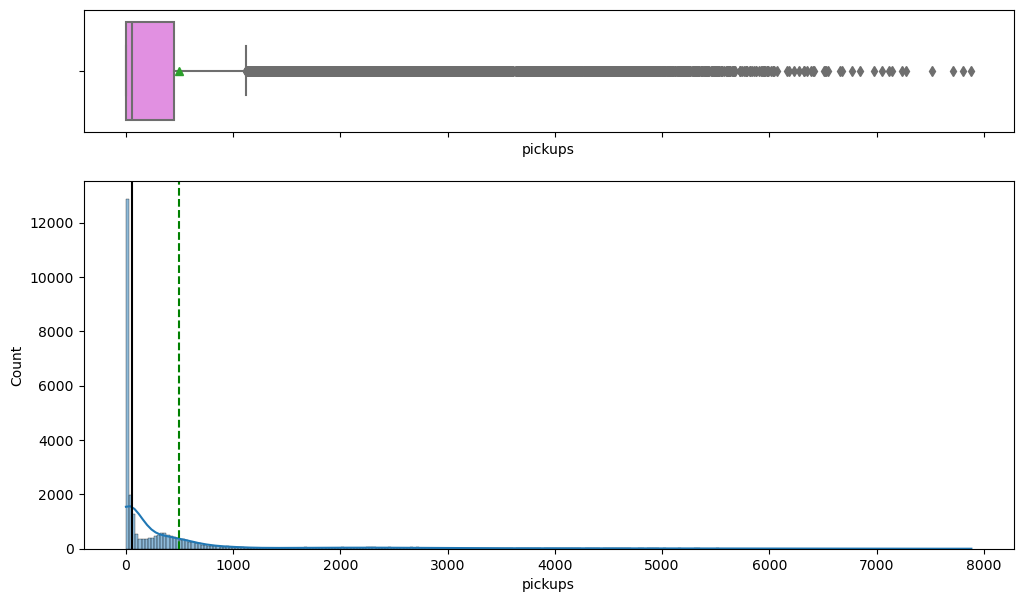

==================================================  analyse violin for pickups 


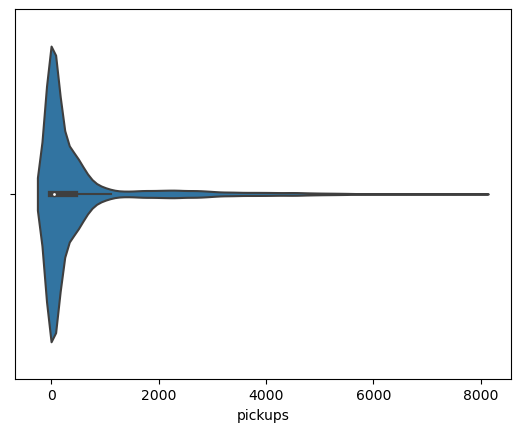

In [24]:
from deepspace.transformers.exploration.univariate.numerical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
#you can check a specific numeric feature:
_ = (_ 
    >> UnivariateAnalysis(num_cols=['pickups']) 
)


**Observations:**
* The distribution of hourly pickups is highly right-skewed.
* The majority of the hourly pickups are close to 0.
* Median pickups are equal to 0, but the mean is ~500.
* There are a lot of outliers in this variable.
* While most hourly pickups are at the lower end, we have observations where hourly pickups went as high as 8000.

###  **Observations on Visibility**

```
histogram_boxplot(df.vsb)
```

================================================== UnivariateAnalysis transform  
==================================================  show_count  
vsb
10.000    0.741487
9.100     0.039071
8.000     0.029037
7.000     0.026803
6.000     0.019243
            ...   
1.250     0.000206
0.850     0.000206
4.375     0.000206
3.560     0.000206
1.950     0.000206
Name: proportion, Length: 179, dtype: float64
--------------------------------------------------
==================================================  analyse  


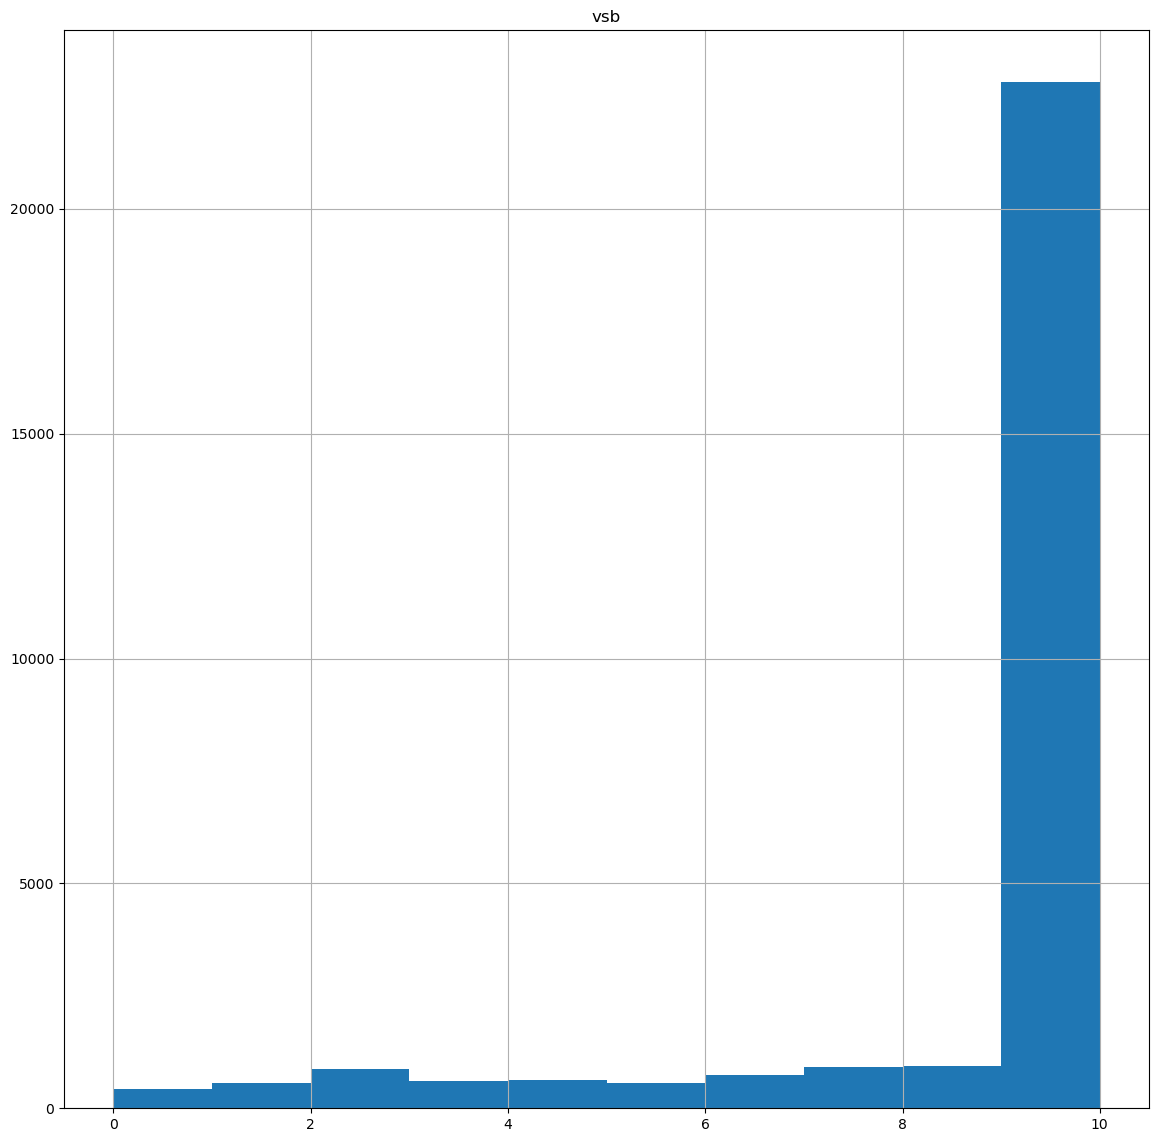

==================================================  analyse histobox for vsb 


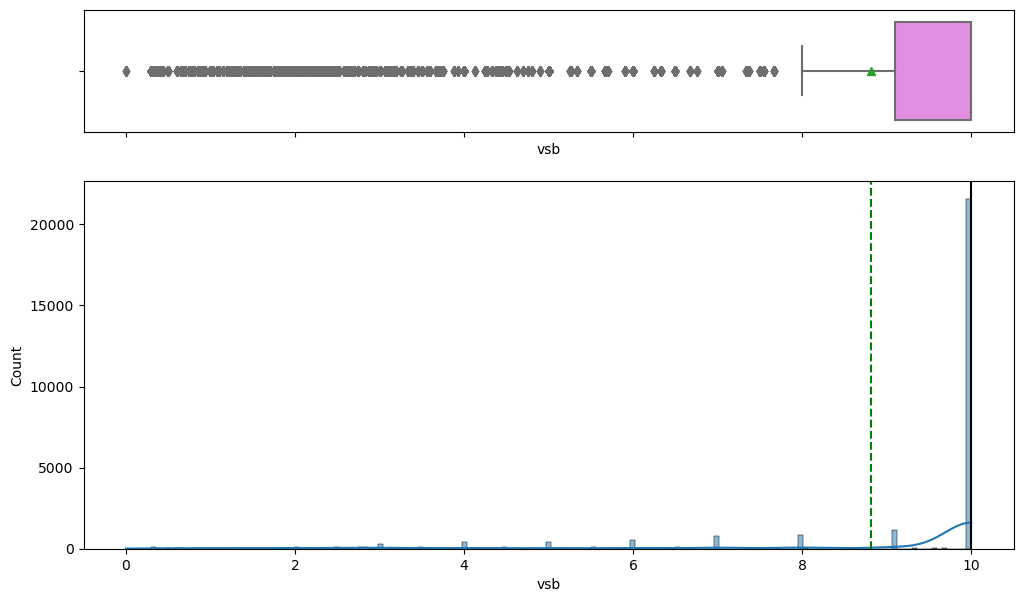

==================================================  analyse violin for vsb 


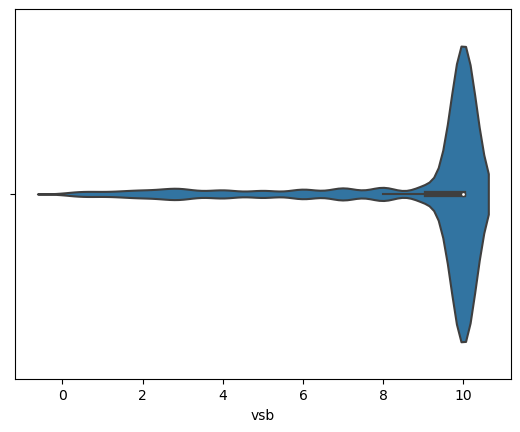

In [25]:

from deepspace.transformers.exploration.univariate.numerical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
#you can check a specific numeric feature:
_ = (_ 
    >> UnivariateAnalysis(num_cols=['vsb']) 
)


**Observations:**
* The distribution of 'visibility' is left-skewed.
* Both the mean and the median are high, indicating that the visibility is good on most days.
* There are, however, outliers towards the left, indicating that visibility is extremely low on some days.
* It will be interesting to see how visibility affects the Uber pickup frequency.

### **Observations on Snow Depth**

```
histogram_boxplot(df.sd)
```

================================================== UnivariateAnalysis transform  
==================================================  show_count  
sd
0.000000     0.693000
8.000000     0.066458
11.000000    0.012439
12.000000    0.011855
9.000000     0.011477
               ...   
8.666667     0.000206
8.895833     0.000206
18.708333    0.000206
8.958333     0.000206
1.041667     0.000206
Name: proportion, Length: 421, dtype: float64
--------------------------------------------------
==================================================  analyse  


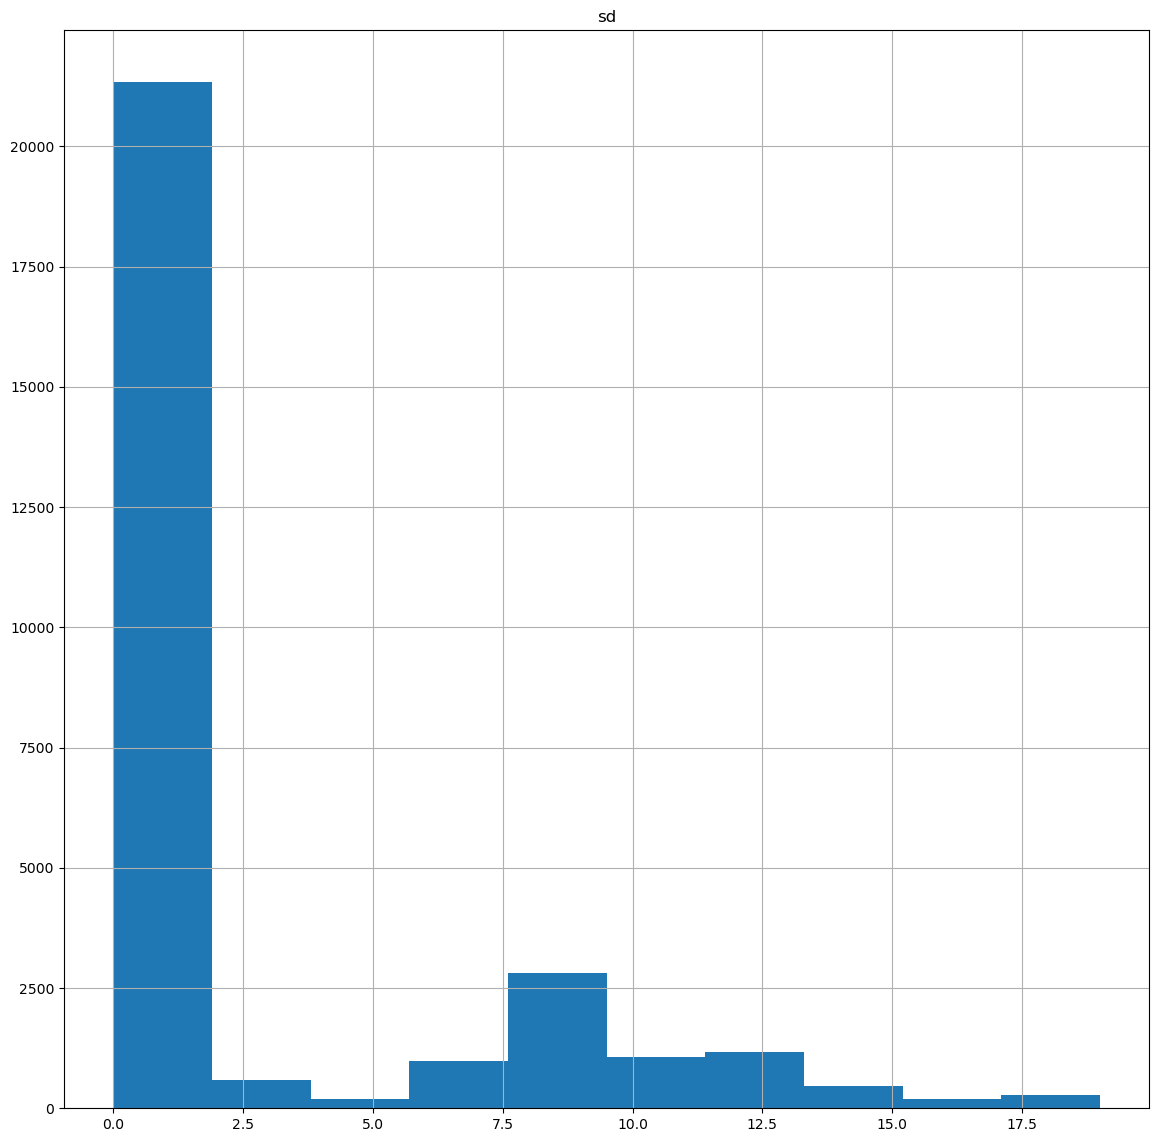

==================================================  analyse histobox for sd 


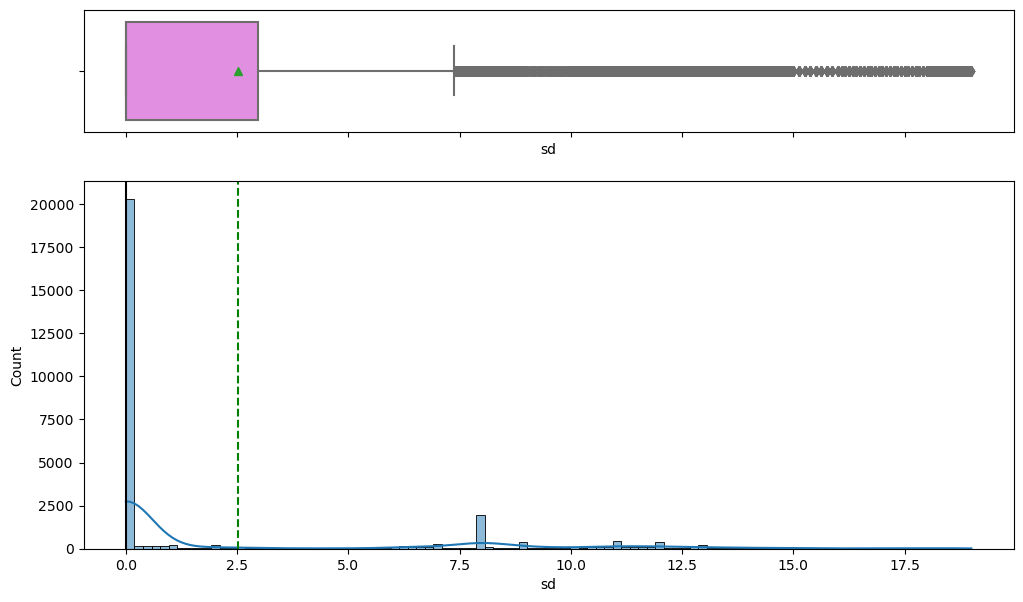

==================================================  analyse violin for sd 


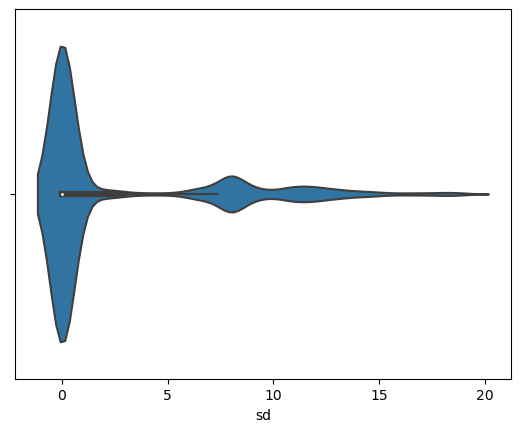

In [26]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.numerical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(num_cols=['sd']) 
)


**Observations:**
* We observe that there is a snowfall in the period that we are analyzing.
* There are outliers in this variable.
* We will have to see how snowfall affects pickups. We know that very few people are likely to get out if it is snowing heavily, so our pickups would likely decrease when it snows.

**Now, let's explore the categorical variables.**

```
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))
    
    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')
    
    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot
```


### **Observations on holiday**

```
bar_perc(df, 'hday')
```

==================================================  show_count  
hday
N    0.961479
Y    0.038521
Name: proportion, dtype: float64
--------------------------------------------------
-------------------------------------------------- hday


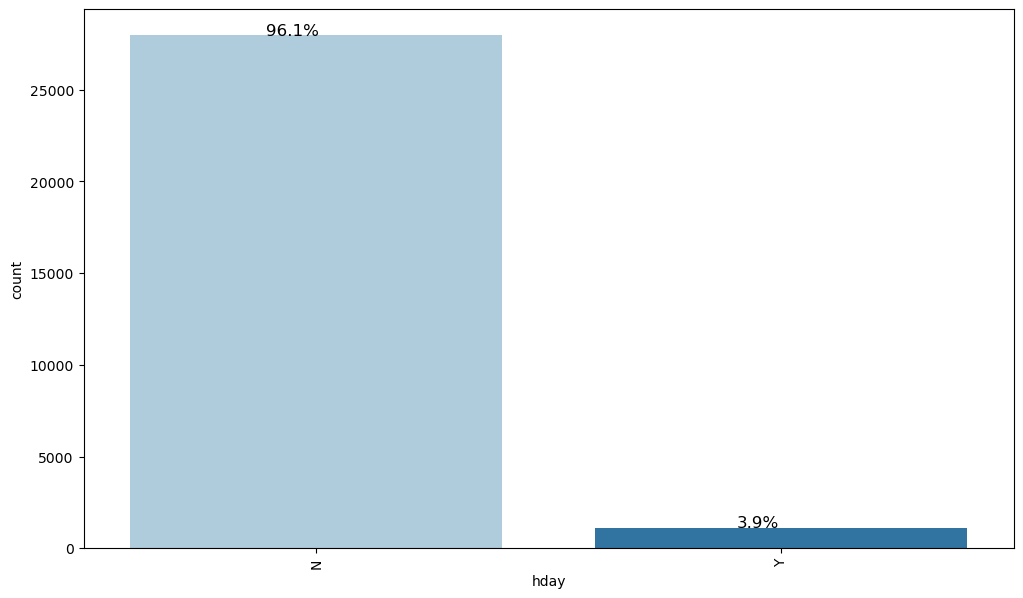

In [27]:
from deepspace.transformers.exploration.univariate.categorical.UnivariateAnalysis import UnivariateAnalysis
#you can check a specific numeric feature:
_ = (_ 
    >> UnivariateAnalysis(cat_cols=['hday']) 
)


**Observation:**

* Only 3.9% of days were holidays in the period that we are analyzing.

### **Observations on borough**

```
bar_perc(df, 'borough')
```

==================================================  show_count  
borough
Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
UNKNOWN          0.104567
Name: proportion, dtype: float64
--------------------------------------------------
-------------------------------------------------- borough


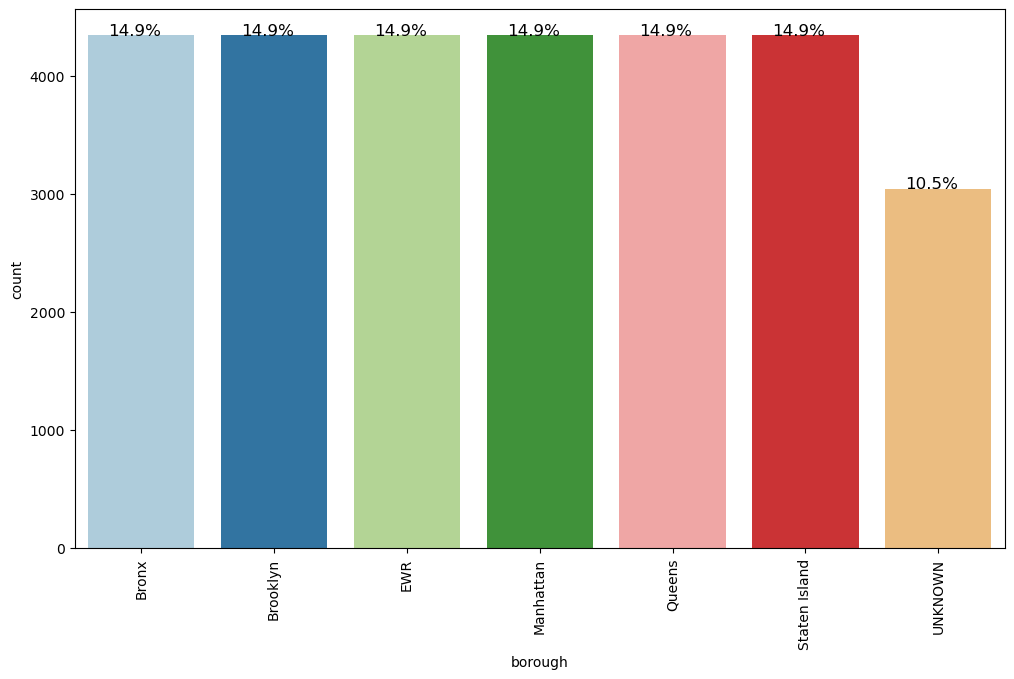

In [28]:
from deepspace.transformers.exploration.univariate.categorical.UnivariateAnalysis import UnivariateAnalysis
#you can check a specific numeric feature:
_ = (_ 
    >> UnivariateAnalysis(cat_cols=['borough']) 
)

**Observation:**

* The observations are uniformly distributed across the boroughs except for the observations that had NaN values and were attributed to the Unknown borough.

## **Exploratory Data Analysis: Multivariate**

**Let's plot multivariate charts between variables to understand their interaction with each other.**

### Correlation

```
# Check for correlation among numerical variables
num_var = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',            
        fmt = ".1f",            
        xticklabels = corr.columns,            
        yticklabels = corr.columns)
```

================================================== CorrHeatmap plot  


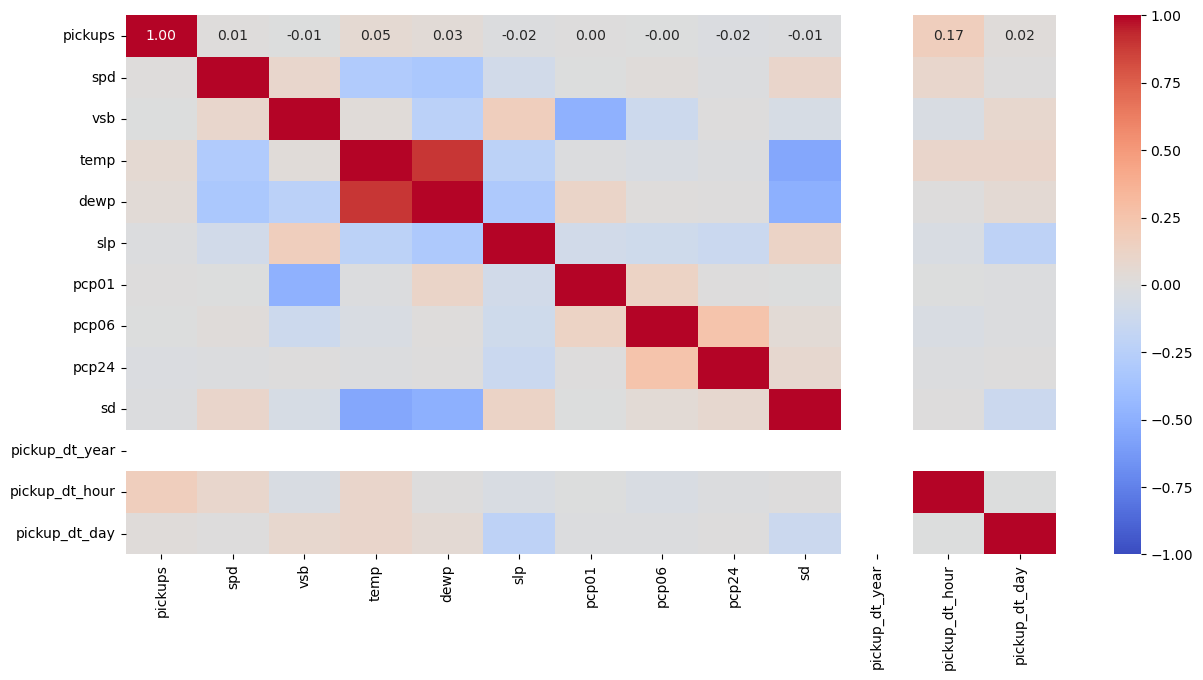

In [29]:
#DeepSpace way:
from deepspace.transformers.exploration.bivariate.CorrHeatmap import CorrHeatmap
_ = (_ 
    >> CorrHeatmap() 
)

**Observations:**

* Dew point is an indication of humidity, which is correlated with temperature and the same thing can be observed in the heatmap as well. Temperature shows a high correlation with dew point.
* Visibility is negatively correlated with precipitation. If the rains are high during the hour, visibility is low. This is aligned with our intuitive understanding.
* Snow depth, of course, would be negatively correlated with the temperature.
* The wind speed and the sea level pressure are negatively correlated with the temperature.
* It is important to note that correlation does not imply causation.
* There does not seem to be a strong relationship between the number of pickups and weather stats.

## **Relationship between pickups and time based variables**

### **Pickups across Months**

```
cats = df.start_month.unique().tolist()
df.start_month = pd.Categorical(df.start_month, ordered = True, categories = cats)
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_month", y = "pickups", data = df, ci = 0, color = "RED", estimator = 'sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()
```

In [30]:
#Deepspace: 
#you can break encapsulation and make your own calculations
_.get_data()['pickup_dt_month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [31]:
#DeepSpace way:
from deepspace.transformers.column.categorical.Adjust import Adjust as AdjustCat, AdjustCategorical
#we set features as categorical and ordered
_ = (_ 
    >> AdjustCategorical(cat_cols=['pickup_dt_month', 'pickup_dt_week_day'], 
                                ordered={
                                    'pickup_dt_month': ['January', 'February', 'March', 'April', 'May', 'June'],
                                    'pickup_dt_week_day': ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
                                })
)

In [ ]:
#DeepSpace way:
from deepspace.transformers.exploration.bivariate.BivariateAnalysis import BivariateAnalysis
#With BivariateAnalysis, Deepspace will show calculations and multiple charts by default (after a cartesian product of all the numeric features)
#could be very verbose
_ = (_ 
    >> BivariateAnalysis(donvn=True, docvn=False, docvc=False, doheatmap=False, violin=False, figsize=(7, 7))
)

In [ ]:
_.get_data()['pickup_dt_month'].unique()


['January', 'February', 'March', 'April', 'May', 'June']
Categories (6, object): ['January' < 'February' < 'March' < 'April' < 'May' < 'June']

================================================== LinePlot plot plot for pickup_dt_month/pickups 


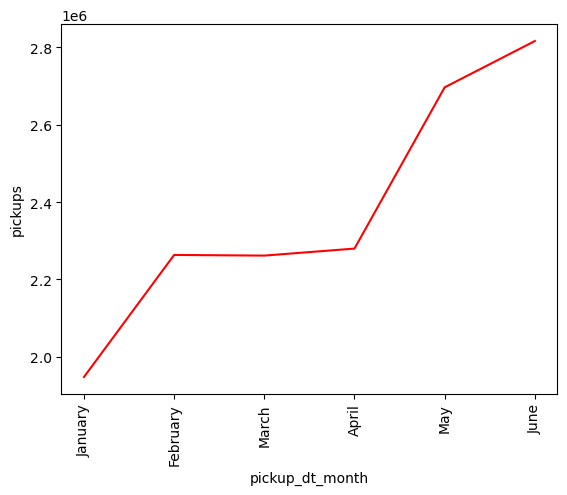

In [33]:
#DeepSpace way:
from deepspace.transformers.exploration.plot.LinePlot import LinePlot
_ = (_ 
        >> LinePlot(x='pickup_dt_month', y='pickups', estimator='sum') 
)

**Observations:**
* There is a clear increasing trend in monthly bookings.
* Bookings in June are almost 1.5 times that of Jan.

### **Pickups vs Days of the Month**

```
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_day", y = "pickups", estimator = 'sum', ci = 0, data = df, color = "RED")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()
```

================================================== LinePlot plot plot for pickup_dt_day/pickups 


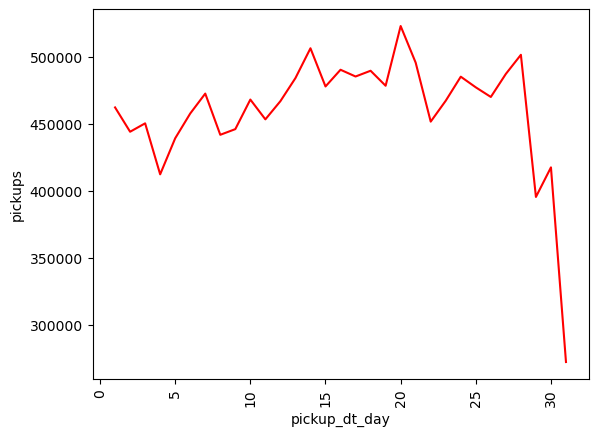

In [34]:
#DeepSpace way:
from deepspace.transformers.exploration.plot.LinePlot import LinePlot
_ = (_ 
    >> LinePlot(x='pickup_dt_day', y='pickups', estimator='sum') 
)

**Observations:**
* Number of pickups are low towards the end of the month (29th - 31st). 
* Number of pickups for 31 might be low because not all months have the 31st day.
* There is a peak in the bookings around the 20th day of the month.

### **Pickups across Weekdays**

```
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df.week_day = pd.Categorical(df.week_day, ordered = True, categories = cats)
plt.figure(figsize = (20, 7))
sns.lineplot(x = "week_day", y = "pickups", ci = 0, data = df, color = "RED")
plt.ylabel('Mean pickups')
plt.xlabel('Weeks')
plt.show()
```

================================================== LinePlot plot plot for pickup_dt_week_day/pickups 


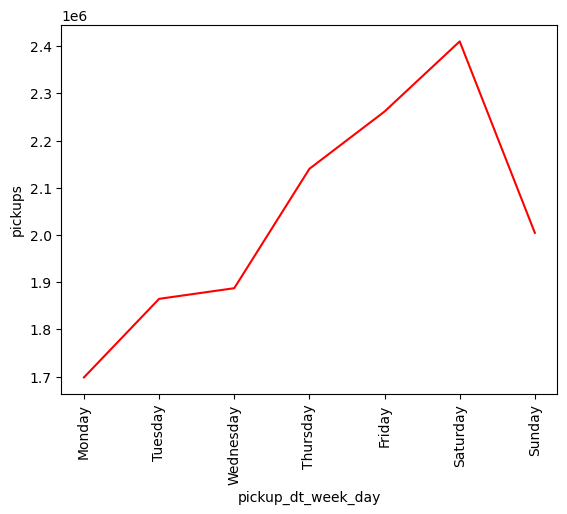

In [35]:
#DeepSpace way:
_ = (_ 
    >> LinePlot(x='pickup_dt_week_day', y='pickups', estimator='sum') 
)

**Observations:**
* Pickups gradually increase as the week progresses and starts dropping after Saturday.
* We need to do more investigation to understand why the demand for Uber is low at the beginning of the week.

### **Pickups across Boroughs**

```
plt.figure(figsize = (20, 10))  
sns.boxplot(x='borough', y='pickups', data=df)
plt.ylabel('pickups')
plt.xlabel('Borough')
plt.show()
```

================================================== BoxPlot plot plot for borough/pickups 


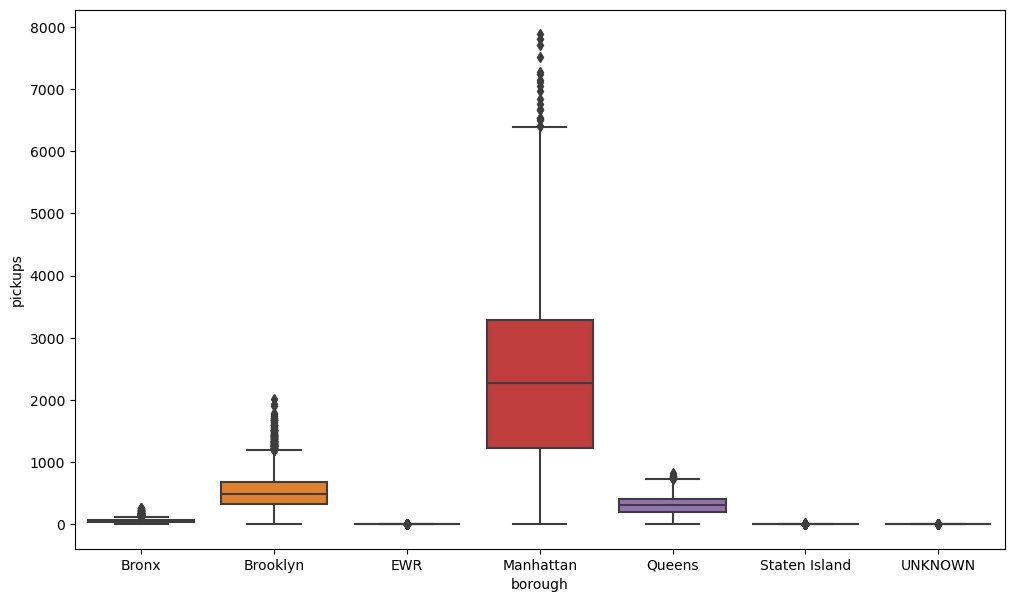

In [36]:
#DeepSpace way:
from deepspace.transformers.exploration.plot.BoxPlot import BoxPlot
_ = (_ 
    >> BoxPlot('borough', 'pickups') 
)

**Observations:**
* There is a clear difference in ridership across the different boroughs.
* Manhattan has the highest number of bookings.
* Brooklyn and Queens are distant followers.
* EWR, Unknown, and Staten Island have a very low number of bookings. The demand is so small that probably it can be covered by the drop-offs of the inbound trips from other areas.

### **Relationship between Pickups and Holidays**

```
df.groupby('hday')['pickups'].mean()
```

In [37]:
#DeepSpace way:
_.get_data().groupby('hday')['pickups'].mean()

hday
N    492.339957
Y    437.199822
Name: pickups, dtype: float64

```
# Check if the trend is similar across boroughs
df.groupby(by = ['borough','hday'])['pickups'].mean()
```

In [38]:
#DeepSpace way:
_.get_data().groupby(by=['borough','hday'])['pickups'].mean()

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
UNKNOWN        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

**Observations:**
1. The mean pickups on holidays are lesser than a non-holiday.
2. Except for Manhattan, mean pickups on holidays are pretty similar to non-holiday pickups.
3. In Queens, mean pickups on holidays are higher.
4. There are hardly any pickups in EWR.

### **Relationship between Pickups and Hour of the day across Boroughs** 

```
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_hour", y = "pickups", ci = 0, data = df, hue = 'borough')
plt.ylabel('Pickups')
plt.xlabel('Hour of the day')
plt.show()
```

================================================== LinePlot plot plot for pickup_dt_hour/pickups 


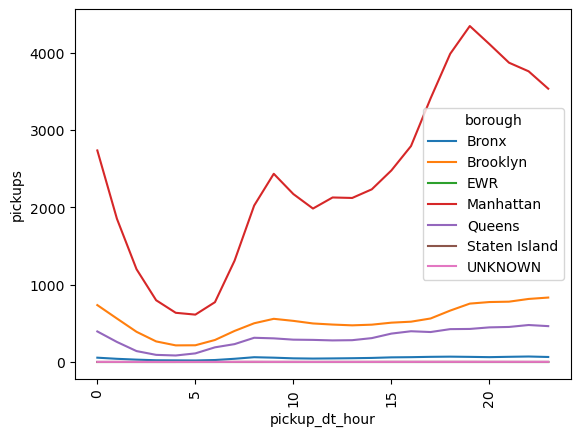

In [39]:
#DeepSpace way:
from deepspace.transformers.exploration.plot.LinePlot import LinePlot
_ = (_ 
        >> LinePlot('pickup_dt_hour', 'pickups', estimator='mean', hue='borough') 
)

In [ ]:
_.get_data()['pickup_dt_hour']

0         1
1         1
2         1
3         1
4         1
         ..
29096    23
29097    23
29098    23
29099    23
29100    23
Name: pickup_dt_hour, Length: 29101, dtype: int32

**Observations:**

* Bookings peak around the 19th and 20th hour of the day and decreases till 5 AM.
* The peak can be attributed to the time people leave their workplaces.
* From 5 AM onwards, we can see an increasing trend till 10, possibly the office rush.
* Pickups go down from 10 AM to 12 PM post that they start increasing.
* The number of pickups in Manhattan is very high and dominant when we see the spread across boroughs. 
* We cannot observe the distribution for EWR and Staten Island boroughs in this plot due to the very low count in these boroughs. Let's try converting the pickups on a logarithmic scale to visualize all the boroughs.

```
plt.figure(figsize = (20, 7))
sns.lineplot(x = df.start_hour, y = np.log1p(df.pickups), estimator ='sum', ci = 0, hue = df.borough)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()
```

================================================== LinePlotLogXPlus1 plot plot for pickup_dt_hour/func_pickups 


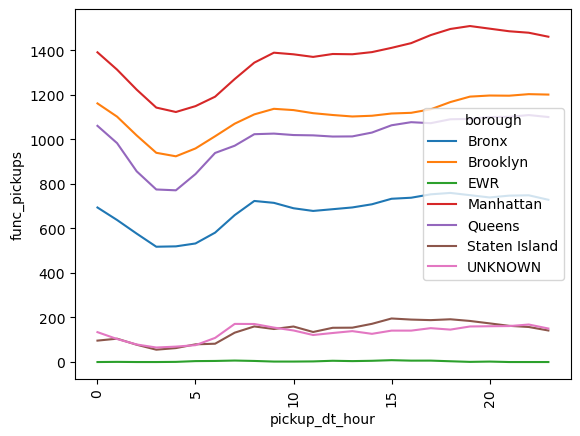

In [40]:
#DeepSpace way:
from deepspace.transformers.exploration.plot.LinePlotLogXPlus1 import LinePlotLogXPlus1
_ = (_ 
        >> LinePlotLogXPlus1('pickup_dt_hour', 'pickups', estimator='sum', hue='borough') 
)

**Observations:**
* Hourly pattern can be seen in almost all the boroughs.
* After applying the logarithmic scale, it is obvious that the four major boroughs follow the same pattern. 
* EWR seems to have a random demand with a majority of the values being zero.
* Manhattan sees the most Uber pickups. Let us explore this borough in more detail.

### Manhattan Pickups Heatmap - Weekday vs Hour

```
df_man = df[df.borough == 'Manhattan']
df_hm = df_man.pivot_table(index = 'start_hour', columns = 'week_day', values = 'pickups')

# Draw a heatmap
plt.figure(figsize = (20, 10)) # To resize the plot
sns.heatmap(df_hm,  fmt = "d", cmap = 'coolwarm', linewidths = .5, vmin = 0)
plt.show()
```

================================================== Pivot plot  


pickup_dt_week_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
pickup_dt_hour,,,,,,,
0,1356.269231,1393.884615,1887.36,2253.040000,3143.461538,4412.692308,4651.423077
1,789.769231,801.192308,1022.08,1357.230769,1726.346154,3375.461538,3861.692308
2,474.807692,467.038462,582.68,809.461538,979.423077,2256.615385,2806.884615
3,314.692308,280.730769,346.00,567.576923,607.346154,1563.230769,1895.269231
4,352.692308,272.576923,326.84,479.884615,547.384615,1128.115385,1336.307692
5,596.115385,455.423077,497.88,587.884615,658.461538,733.346154,757.346154
6,905.653846,800.038462,857.20,886.384615,896.846154,565.000000,509.000000
7,1556.500000,1604.923077,1676.00,1675.384615,1559.269231,616.230769,496.115385
8,2376.923077,2564.961538,2656.04,2657.961538,2463.423077,834.500000,632.115385


================================================== Heatmap plot  


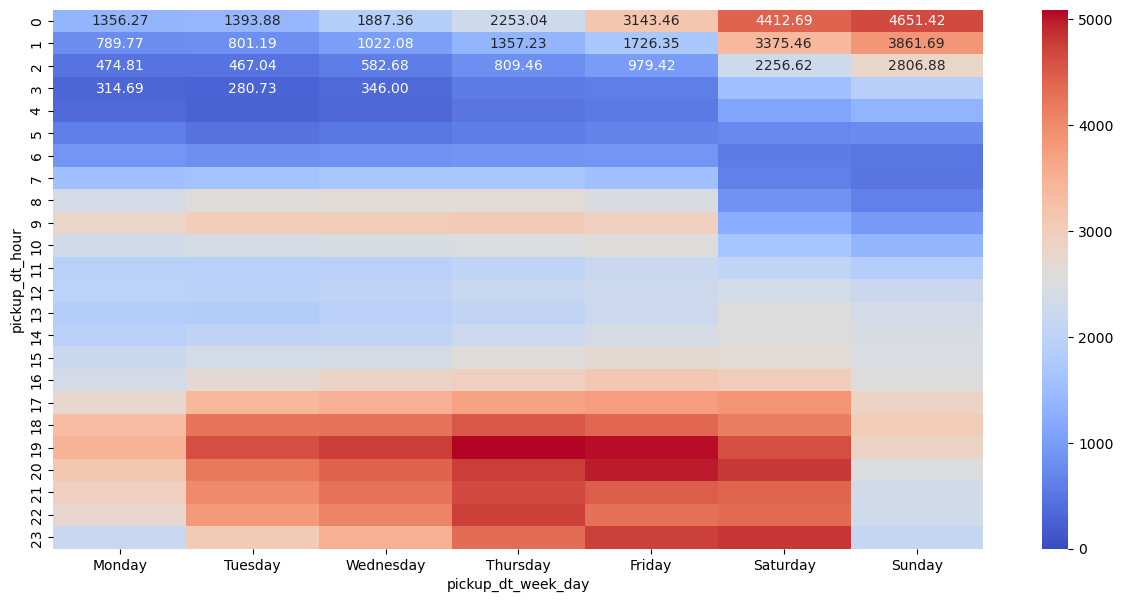

In [41]:
#DeepSpace way: TODO XYZ
from deepspace.transformers.exploration.bivariate.Pivot import Pivot
from deepspace.transformers.exploration.bivariate.Heatmap import Heatmap
(_ >> Pivot(index = 'pickup_dt_hour', 
           columns = 'pickup_dt_week_day', 
           values = 'pickups',
           filter='''borough == "Manhattan"''') 
  >> Heatmap()
)

**Observations:**

* The demand for Uber peaks during the late hours of the day when people are returning home from the office.
* Demand continues to be high during the late hours of the day (midnight) on Fridays and Saturdays.  
* It is odd that the demand for Uber is not as high on Monday evenings in comparison to other working days.

## **Conclusion and Recommendations**

-----------------------------------------------------------------
### **Conclusion**
-----------------------------------------------------------------

We analyzed a dataset of nearly 30K hourly Uber pickup information, from New York boroughs.
The data spanned every day of the first six months of the year 2015.
The main feature of interest here is the number of pickups. 
From an environmental and business perspective, having cars roaming in an area while the demand is in another or filling the streets with cars during a low demand period while lacking during peak hours is inefficient. Thus, we determined the factors that affect pickup and the nature of their effect.

We have been able to conclude that: 

1. Uber cabs are most popular in the Manhattan area of New York.
2. Contrary to intuition, weather conditions do not have much impact on the number of Uber pickups.
3. The demand for Uber has been increasing steadily over the months (Jan to June).
4. The rate of pickups is higher on the weekends in comparison to weekdays.
5. It is encouraging to see that New Yorkers trust Uber taxi services when they step out to enjoy their evenings.
6. We can also conclude that people use Uber for regular office commutes. The demand steadily increases from 6 AM to 10 AM, then declines a little and starts picking up till midnight. The demand peaks at 7-8 PM.
7. We need to further investigate the low demand for Uber on Mondays.

--------------------------------------------------
### **Recommendation to business**
--------------------------------------------------

1. Manhattan is the most mature market for Uber. Brooklyn, Queens, and Bronx show potential. 
2. There has been a gradual increase in Uber rides over the last few months, and we need to keep up the momentum.
3. Riderships are high at peak office commute hours on weekdays and during late evenings on Saturdays. Cab availability must be ensured during these times.
4. The demand for cabs is the highest on Saturday nights. Cab availability must be ensured during this time of the week.
5. Procure data for fleet size availability to get a better understanding of the demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimize the cab fleet in respective areas.
6. Procure more data on price and build a model that can predict optimal pricing.

---------------------------------
###  **Further Analysis**
---------------------------------
1. Dig deeper to explore the variation of cab demand, during working days and non-working days. You can combine Weekends+Holidays to be non-working days and weekdays to be the working days.
2. Drop the boroughs that have negligible pickups and then analyze the data to uncover more insights.